# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhamad Thirafi Qaedi Setiawan
- Email: Qaedi68@gmail.com
- Id Dicoding: muhamadthirafi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import io
import pickle
import os
import statsmodels.formula.api as ols
import statsmodels.api as sm
from sqlalchemy import create_engine
from itertools import combinations
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Menyiapkan data yang akan digunakan

load data dan pisahkan data yang blm di pisahkan.

In [ ]:
Student_df = pd.read_csv('/content/data.csv', sep=';')

## Data Understanding

In [ ]:
Student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
Student_df.shape

(4424, 37)

In [ ]:
Student_df.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Status']

In [ ]:
Student_df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [ ]:
Student_df.duplicated().sum()

np.int64(0)

Insight:

#### **Overview Dataset**

Dataset ini berisi informasi tentang **4424 mahasiswa** dengan **37 kolom**. Dataset ini memberikan data rinci tentang mahasiswa, seperti status pernikahan, mode pendaftaran, program studi, nilai, kehadiran, dan lainnya. Berikut adalah rincian dataset:

- **Jumlah Entri**: 4424 mahasiswa
- **Jumlah Kolom**: 37 kolom
- **Nilai Non-Null**: Setiap kolom memiliki 4424 nilai non-null, yang berarti tidak ada nilai yang hilang dalam dataset ini.
- **Sumber** :   [Dicoding]("https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance")(yang digunakan) , [original]("https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success")(opsional)

#### **Kolom dan Deskripsi**

| **Kolom Nama**                            | **Deskripsi**                                                                                                                                         |
|--------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Marital_status**                         | The marital status of the student. (Categorical: 1 – single, 2 – married, 3 – widower, 4 – divorced, etc.)                                               |
| **Application_mode**                       | The method of application used by the student. (Categorical: 1st phase, International student, etc.)                                                     |
| **Application_order**                      | The order in which the student applied. (Numerical: 0 – first choice, 9 – last choice)                                                                 |
| **Course**                                 | The course taken by the student. (Categorical: e.g., Biofuel Production Technologies, Animation, Agronomy, etc.)                                       |
| **Daytime_evening_attendance**             | Whether the student attends classes during the day or evening. (Categorical: 1 – daytime, 0 – evening)                                                 |
| **Previous_qualification**                 | The qualification obtained by the student before enrolling. (Categorical: Secondary education, Bachelor's, Master's, etc.)                            |
| **Previous_qualification_grade**           | Grade of previous qualification (between 0 and 200)                                                                                                     |
| **Nationality**                            | The nationality of the student. (Categorical: e.g., Portuguese, German, Brazilian, etc.)                                                               |
| **Mothers_qualification**                  | The qualification of the student's mother. (Categorical: e.g., Secondary Education, Bachelor's Degree, Master's, Doctorate, etc.)                     |
| **Fathers_qualification**                  | The qualification of the student's father. (Categorical: e.g., Secondary Education, Bachelor's Degree, Master's, Doctorate, etc.)                     |
| **Mothers_occupation**                     | The occupation of the student's mother. (Categorical: e.g., Student, Health professionals, Teachers, etc.)                                              |
| **Fathers_occupation**                     | The occupation of the student's father. (Categorical: e.g., Student, Teachers, Health professionals, etc.)                                              |
| **Admission_grade**                        | Admission grade (between 0 and 200)                                                                                                                     |
| **Displaced**                              | Whether the student is a displaced person. (Categorical: 1 – yes, 0 – no)                                                                               |
| **Educational_special_needs**              | Whether the student has any special educational needs. (Categorical: 1 – yes, 0 – no)                                                                 |
| **Debtor**                                 | Whether the student is a debtor. (Categorical: 1 – yes, 0 – no)                                                                                       |
| **Tuition_fees_up_to_date**                | Whether the student's tuition fees are up to date. (Categorical: 1 – yes, 0 – no)                                                                     |
| **Gender**                                 | The gender of the student. (Categorical: 1 – male, 0 – female)                                                                                        |
| **Scholarship_holder**                     | Whether the student is a scholarship holder. (Categorical: 1 – yes, 0 – no)                                                                           |
| **Age_at_enrollment**                      | The age of the student at the time of enrollment. (Numerical)                                                                                         |
| **International**                          | Whether the student is an international student. (Categorical: 1 – yes, 0 – no)                                                                      |
| **Curricular_units_1st_sem_credited**      | The number of curricular units credited by the student in the first semester. (Numerical)                                                              |
| **Curricular_units_1st_sem_enrolled**      | The number of curricular units enrolled by the student in the first semester. (Numerical)                                                              |
| **Curricular_units_1st_sem_evaluations**   | The number of curricular units evaluated by the student in the first semester. (Numerical)                                                             |
| **Curricular_units_1st_sem_approved**      | The number of curricular units approved by the student in the first semester. (Numerical)                                                              |
| **Status**                                 | The student's final status: (Categorical) Dropout, Graduate, Enrolled                                                                                 |



#### **Karakteristik Data**

- Dataset ini menyediakan berbagai fitur, termasuk **student demographics**, **educational background**, dan **academic performance**.
- **Variabel Kategorikal**: Banyak kolom seperti marital status, nationality, dan course  adalah kategorikal, dengan masing-masing memiliki kategori yang telah ditentukan sebelumnya.
- **Variabel Numerik**: Kolom seperti admission grade, age at enrollment, and curricular units adalah numerik, yang mewakili kuantitas yang dapat diukur.
- **Data yang Hilang**: Dataset ini tidak memiliki nilai yang hilang, memastikan integritas data.
- **Data Duplikat**: Dataset ini tidak memiliki nilai yang duplikat, memastikan integritas data.


### Penjelasan data setiap kolum

In [ ]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
# memisahkan kolom tipe numerik dan kategori awal
pre_numerical_features = Student_df.select_dtypes(include='number').columns
pre_categorical_features = Student_df.select_dtypes(include='object').columns

# print kolom numerik
print('kolom numerik : ')
for col in pre_numerical_features:
  print(f"-{col}")

# print kolom kategori
print('\nkolom kategori : ')
for col in pre_categorical_features:
  print(f"-{col}")

kolom numerik : 
-Marital_status
-Application_mode
-Application_order
-Course
-Daytime_evening_attendance
-Previous_qualification
-Previous_qualification_grade
-Nacionality
-Mothers_qualification
-Fathers_qualification
-Mothers_occupation
-Fathers_occupation
-Admission_grade
-Displaced
-Educational_special_needs
-Debtor
-Tuition_fees_up_to_date
-Gender
-Scholarship_holder
-Age_at_enrollment
-International
-Curricular_units_1st_sem_credited
-Curricular_units_1st_sem_enrolled
-Curricular_units_1st_sem_evaluations
-Curricular_units_1st_sem_approved
-Curricular_units_1st_sem_grade
-Curricular_units_1st_sem_without_evaluations
-Curricular_units_2nd_sem_credited
-Curricular_units_2nd_sem_enrolled
-Curricular_units_2nd_sem_evaluations
-Curricular_units_2nd_sem_approved
-Curricular_units_2nd_sem_grade
-Curricular_units_2nd_sem_without_evaluations
-Unemployment_rate
-Inflation_rate
-GDP

kolom kategori : 
-Status


Data disini tipenya masih berbeda dibanding dengan yang di deskripsikan, akan di perbaiki di proses selanjutnya

Cek Nilai unique semua kelas

In [ ]:
for column in Student_df:
    distinct_values = Student_df[column].nunique()
    print(f"Kolom '{column}' mengandung {distinct_values} nilai yang unik.")

Kolom 'Marital_status' mengandung 6 nilai yang unik.
Kolom 'Application_mode' mengandung 18 nilai yang unik.
Kolom 'Application_order' mengandung 8 nilai yang unik.
Kolom 'Course' mengandung 17 nilai yang unik.
Kolom 'Daytime_evening_attendance' mengandung 2 nilai yang unik.
Kolom 'Previous_qualification' mengandung 17 nilai yang unik.
Kolom 'Previous_qualification_grade' mengandung 101 nilai yang unik.
Kolom 'Nacionality' mengandung 21 nilai yang unik.
Kolom 'Mothers_qualification' mengandung 29 nilai yang unik.
Kolom 'Fathers_qualification' mengandung 34 nilai yang unik.
Kolom 'Mothers_occupation' mengandung 32 nilai yang unik.
Kolom 'Fathers_occupation' mengandung 46 nilai yang unik.
Kolom 'Admission_grade' mengandung 620 nilai yang unik.
Kolom 'Displaced' mengandung 2 nilai yang unik.
Kolom 'Educational_special_needs' mengandung 2 nilai yang unik.
Kolom 'Debtor' mengandung 2 nilai yang unik.
Kolom 'Tuition_fees_up_to_date' mengandung 2 nilai yang unik.
Kolom 'Gender' mengandung 2 n

In [ ]:
for column_name in Student_df.columns:
    distinct_values = Student_df[column_name].unique()
    print(f"Nilai Unique pada kolom '{column_name}': {distinct_values}")
    print("=" * 50)

Nilai Unique pada kolom 'Marital_status': [1 2 4 3 5 6]
Nilai Unique pada kolom 'Application_mode': [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Nilai Unique pada kolom 'Application_order': [5 1 2 4 3 6 9 0]
Nilai Unique pada kolom 'Course': [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Nilai Unique pada kolom 'Daytime_evening_attendance': [1 0]
Nilai Unique pada kolom 'Previous_qualification': [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Nilai Unique pada kolom 'Previous_qualification_grade': [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  1

Cek nilai unique dari data categorical

In [ ]:
cate_columns_by_info = ['Marital_status', 'Application_mode',
 'Course', 'Daytime_evening_attendance', 'Previous_qualification',
 'Nacionality','Mothers_qualification', 'Fathers_qualification',
 'Mothers_occupation','Fathers_occupation','Displaced','Educational_special_needs',
 'Debtor','Tuition_fees_up_to_date','Gender','Scholarship_holder',
 'International','Status']

for column in cate_columns_by_info:
    if column in Student_df.columns:
        unique_categories = Student_df[column].dropna().unique()
        print(f"Kolom '{column}' memiliki kategori unik: {unique_categories}")
        print("-" * 50)
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
        print("-" * 50)

Kolom 'Marital_status' memiliki kategori unik: [1 2 4 3 5 6]
--------------------------------------------------
Kolom 'Application_mode' memiliki kategori unik: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
--------------------------------------------------
Kolom 'Course' memiliki kategori unik: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
--------------------------------------------------
Kolom 'Daytime_evening_attendance' memiliki kategori unik: [1 0]
--------------------------------------------------
Kolom 'Previous_qualification' memiliki kategori unik: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
--------------------------------------------------
Kolom 'Nacionality' memiliki kategori unik: [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
--------------------------------------------------
Kolom 'Mothers_qualification' memiliki kategori unik: [19  1 37 38  3  4 42  2 34 12 40  9  5 39 

In [ ]:
Student_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Perhatikan bahwa nilai statistik ini cenderung memperlakukan kategori sebagai variabel numerik. Oleh karena itu, diperlukan penanganan khusus agar statistik deskriptif yang ditampilkan hanya mencakup variabel numerik yang sesungguhnya.








####EDA Sebelum prosessing

Numeric

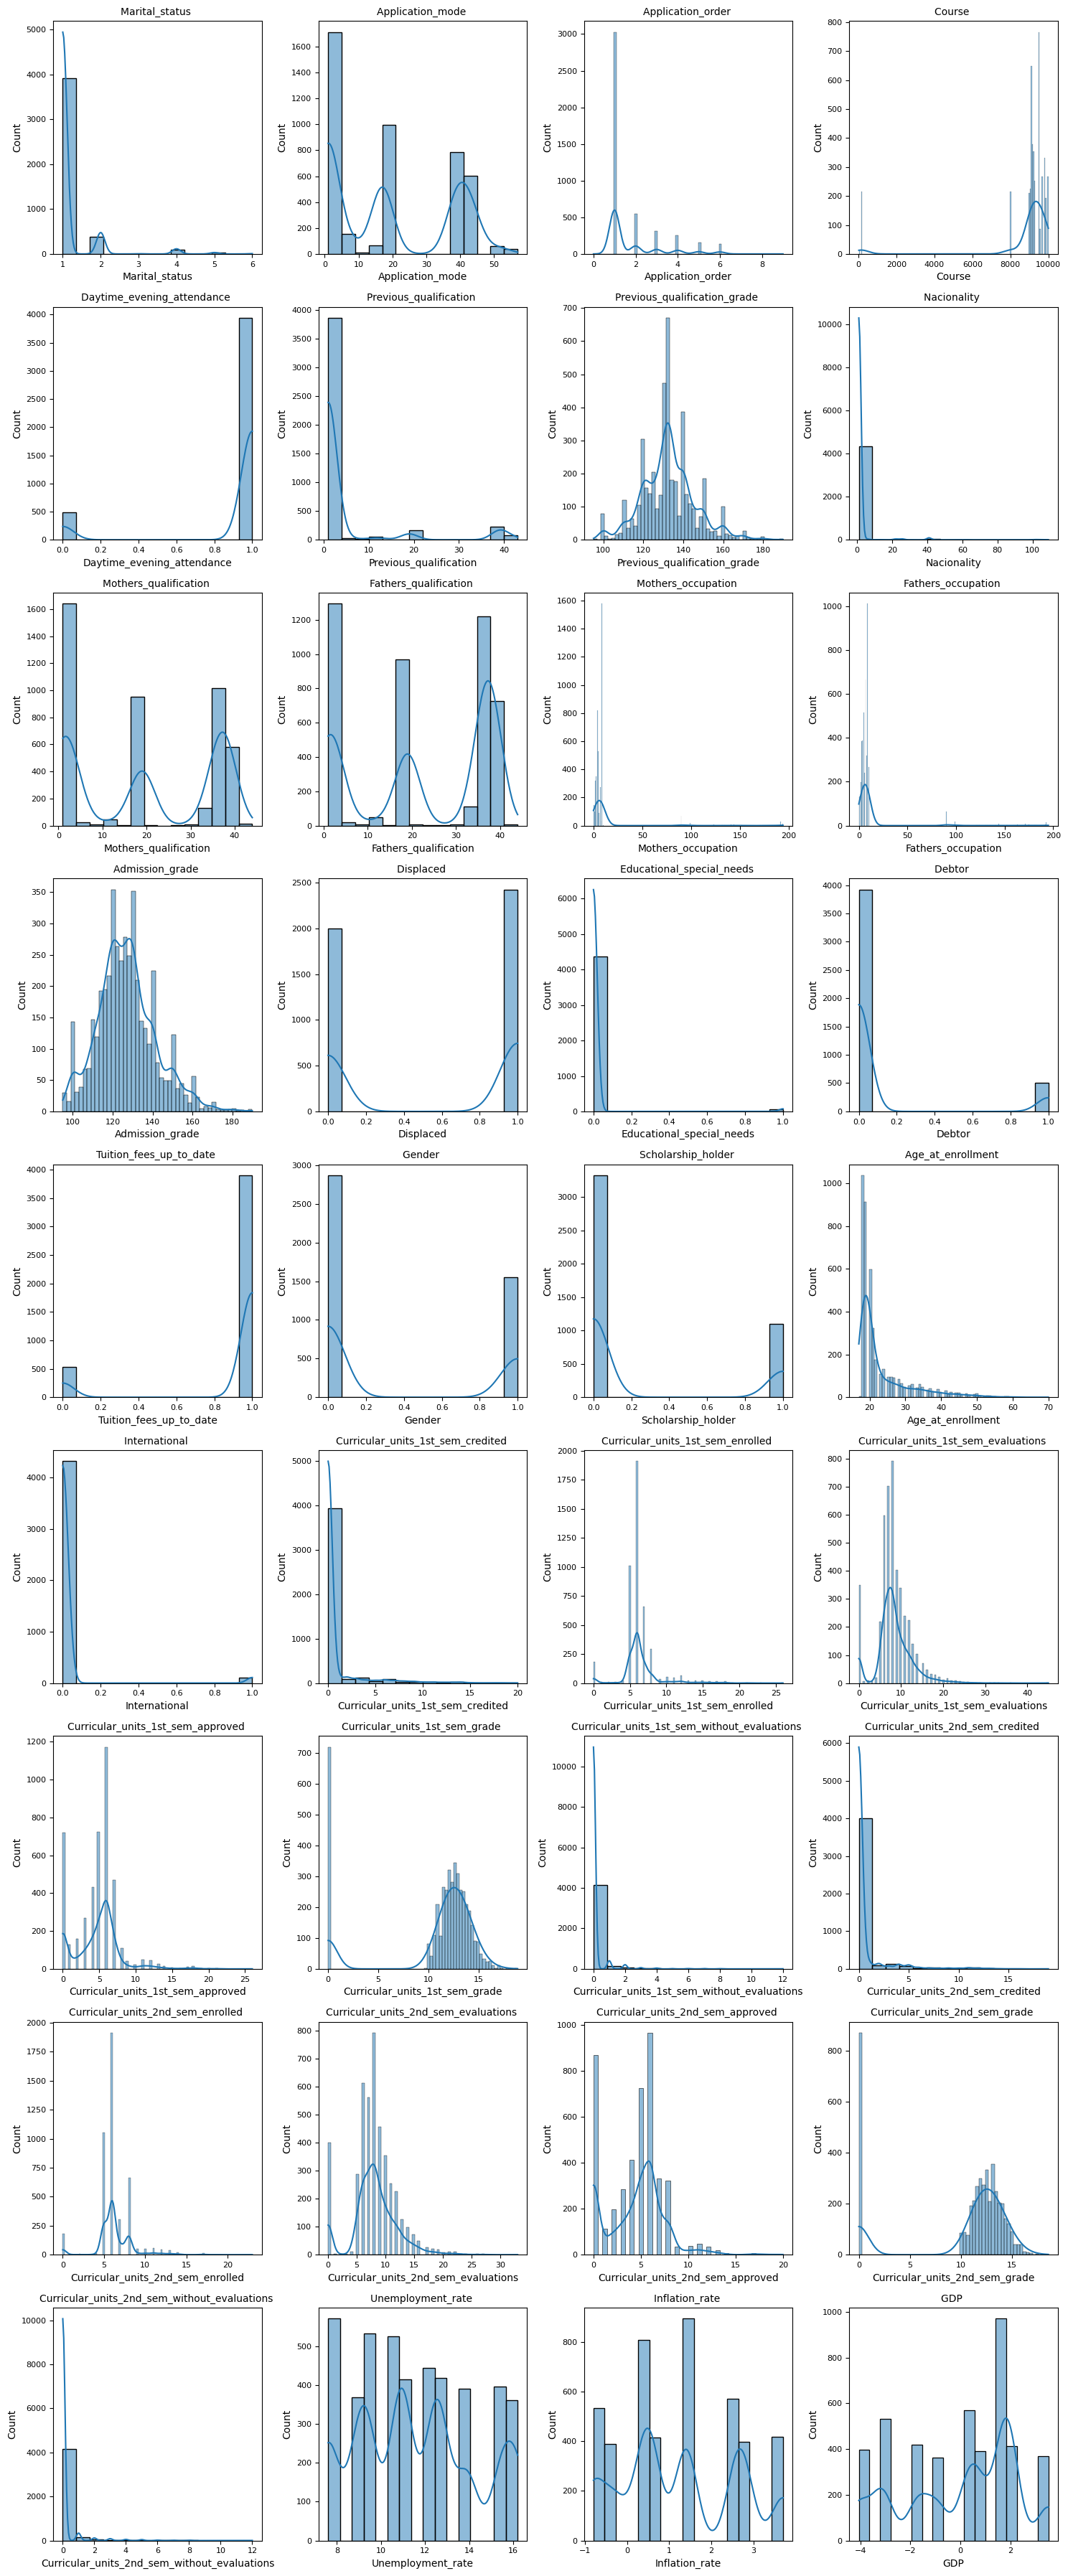

In [ ]:
num_cols = len(pre_numerical_features)
ncols = min(num_cols, 4)
nrows = (num_cols + ncols - 1) // ncols

# Figure dan Axes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(pre_numerical_features):
    ax = axes[i]
    sns.histplot(Student_df[col], kde=True, ax=ax)
    ax.set_title(f'{col} ', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 category

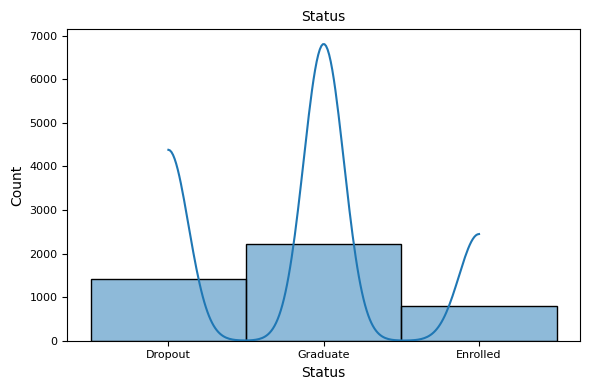

In [ ]:

col_to_display = pre_categorical_features[0]

# Membuat figure dan axes untuk 1 plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot histogram dengan distribusi KDE
sns.histplot(Student_df[col_to_display], kde=True, ax=ax)

# Menambahkan judul dan menyesuaikan label
ax.set_title(f'{col_to_display}', fontsize=10)
ax.tick_params(axis='both', labelsize=8)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

Hasil plot masih data yang menjonjol ke numeric karena masih belum di perbaiki tipe datanya.

## Data Preparation / Preprocessing

Untuk **Missing value** dan **Data duplicate** tidak dilakukan karena tidak ada di data

##### **Memperbaiki tipe data**

sebelumnya di data understanding diatas data yang categorical masih terbaca sebagai numeric disini akan dilakukan pengubahan data  yang seharusnya categorical ke jenis categocrical

In [ ]:
cols_to_category = ['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder'
]

def ubah_ke_category(df, cols_to_category):
    for col in cols_to_category:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            print(f"Kolom '{col}' tidak ditemukan dalam DataFrame.")
    return df

Student_df = ubah_ke_category(Student_df, cols_to_category)
print(Student_df.dtypes)

Marital_status                                  category
Application_mode                                category
Application_order                                  int64
Course                                          category
Daytime_evening_attendance                      category
Previous_qualification                          category
Previous_qualification_grade                     float64
Nacionality                                     category
Mothers_qualification                           category
Fathers_qualification                           category
Mothers_occupation                              category
Fathers_occupation                              category
Admission_grade                                  float64
Displaced                                       category
Educational_special_needs                       category
Debtor                                          category
Tuition_fees_up_to_date                         category
Gender                         

##### **ENCODING**

Pertama Mengubah nilai di ``status`` yang memilki nilai 'Enrolled' dan 'Graduate' jadi 'Safe'

In [ ]:
Student_df.loc[
    (Student_df['Status'] == 'Enrolled') | (Student_df['Status'] == 'Graduate'),
    'Status'
] = 'Safe'


print("DataFrame setelah Kolom 'Status' diubah menjadi 2 kategori:")
print(Student_df['Status'], "\n")

DataFrame setelah Kolom 'Status' diubah menjadi 2 kategori:
0       Dropout
1          Safe
2       Dropout
3          Safe
4          Safe
         ...   
4419       Safe
4420    Dropout
4421    Dropout
4422       Safe
4423       Safe
Name: Status, Length: 4424, dtype: object 



Selanjutnya melakukan LabelEncoder pada status dan mengubah ``'Encoded_Status'`` dan  ``'Status'`` jadi category

In [ ]:
Lencoder = LabelEncoder()  # Membuat objek LabelEncoder
Student_df['Encoded_Status'] = Lencoder.fit_transform(Student_df['Status'])  # Melakukan encoding pada kolom 'Status'

Student_df['Encoded_Status'] = Student_df['Encoded_Status'].astype('category')
Student_df['Status'] = Student_df['Status'].astype('category')

print("DataFrame student_df setelah melakukan encoding pada kolom 'Status':")
print(Student_df[['Status', 'Encoded_Status']],"\n")

print("Mapping hasil LabelEncoder untuk kolom 'Status' yang telah di-encode:")
for idx, kategori in enumerate(Lencoder.classes_):
    print(f"{kategori} => {idx}")

DataFrame student_df setelah melakukan encoding pada kolom 'Status':
       Status Encoded_Status
0     Dropout              0
1        Safe              1
2     Dropout              0
3        Safe              1
4        Safe              1
...       ...            ...
4419     Safe              1
4420  Dropout              0
4421  Dropout              0
4422     Safe              1
4423     Safe              1

[4424 rows x 2 columns] 

Mapping hasil LabelEncoder untuk kolom 'Status' yang telah di-encode:
Dropout => 0
Safe => 1


### Statistic deskripsif setiap Nilai Kolom Numeric

In [ ]:
Student_df.describe()

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### EDA-post preprosessing

In [ ]:
# memisahkan kolom tipe numerik dan kategori
pos_numerical_features = Student_df.select_dtypes(include=np.number).columns.tolist()
pos_categorical_features = Student_df.select_dtypes(include='category').columns.tolist()

#####Numerik feature

Numerik feature histogram

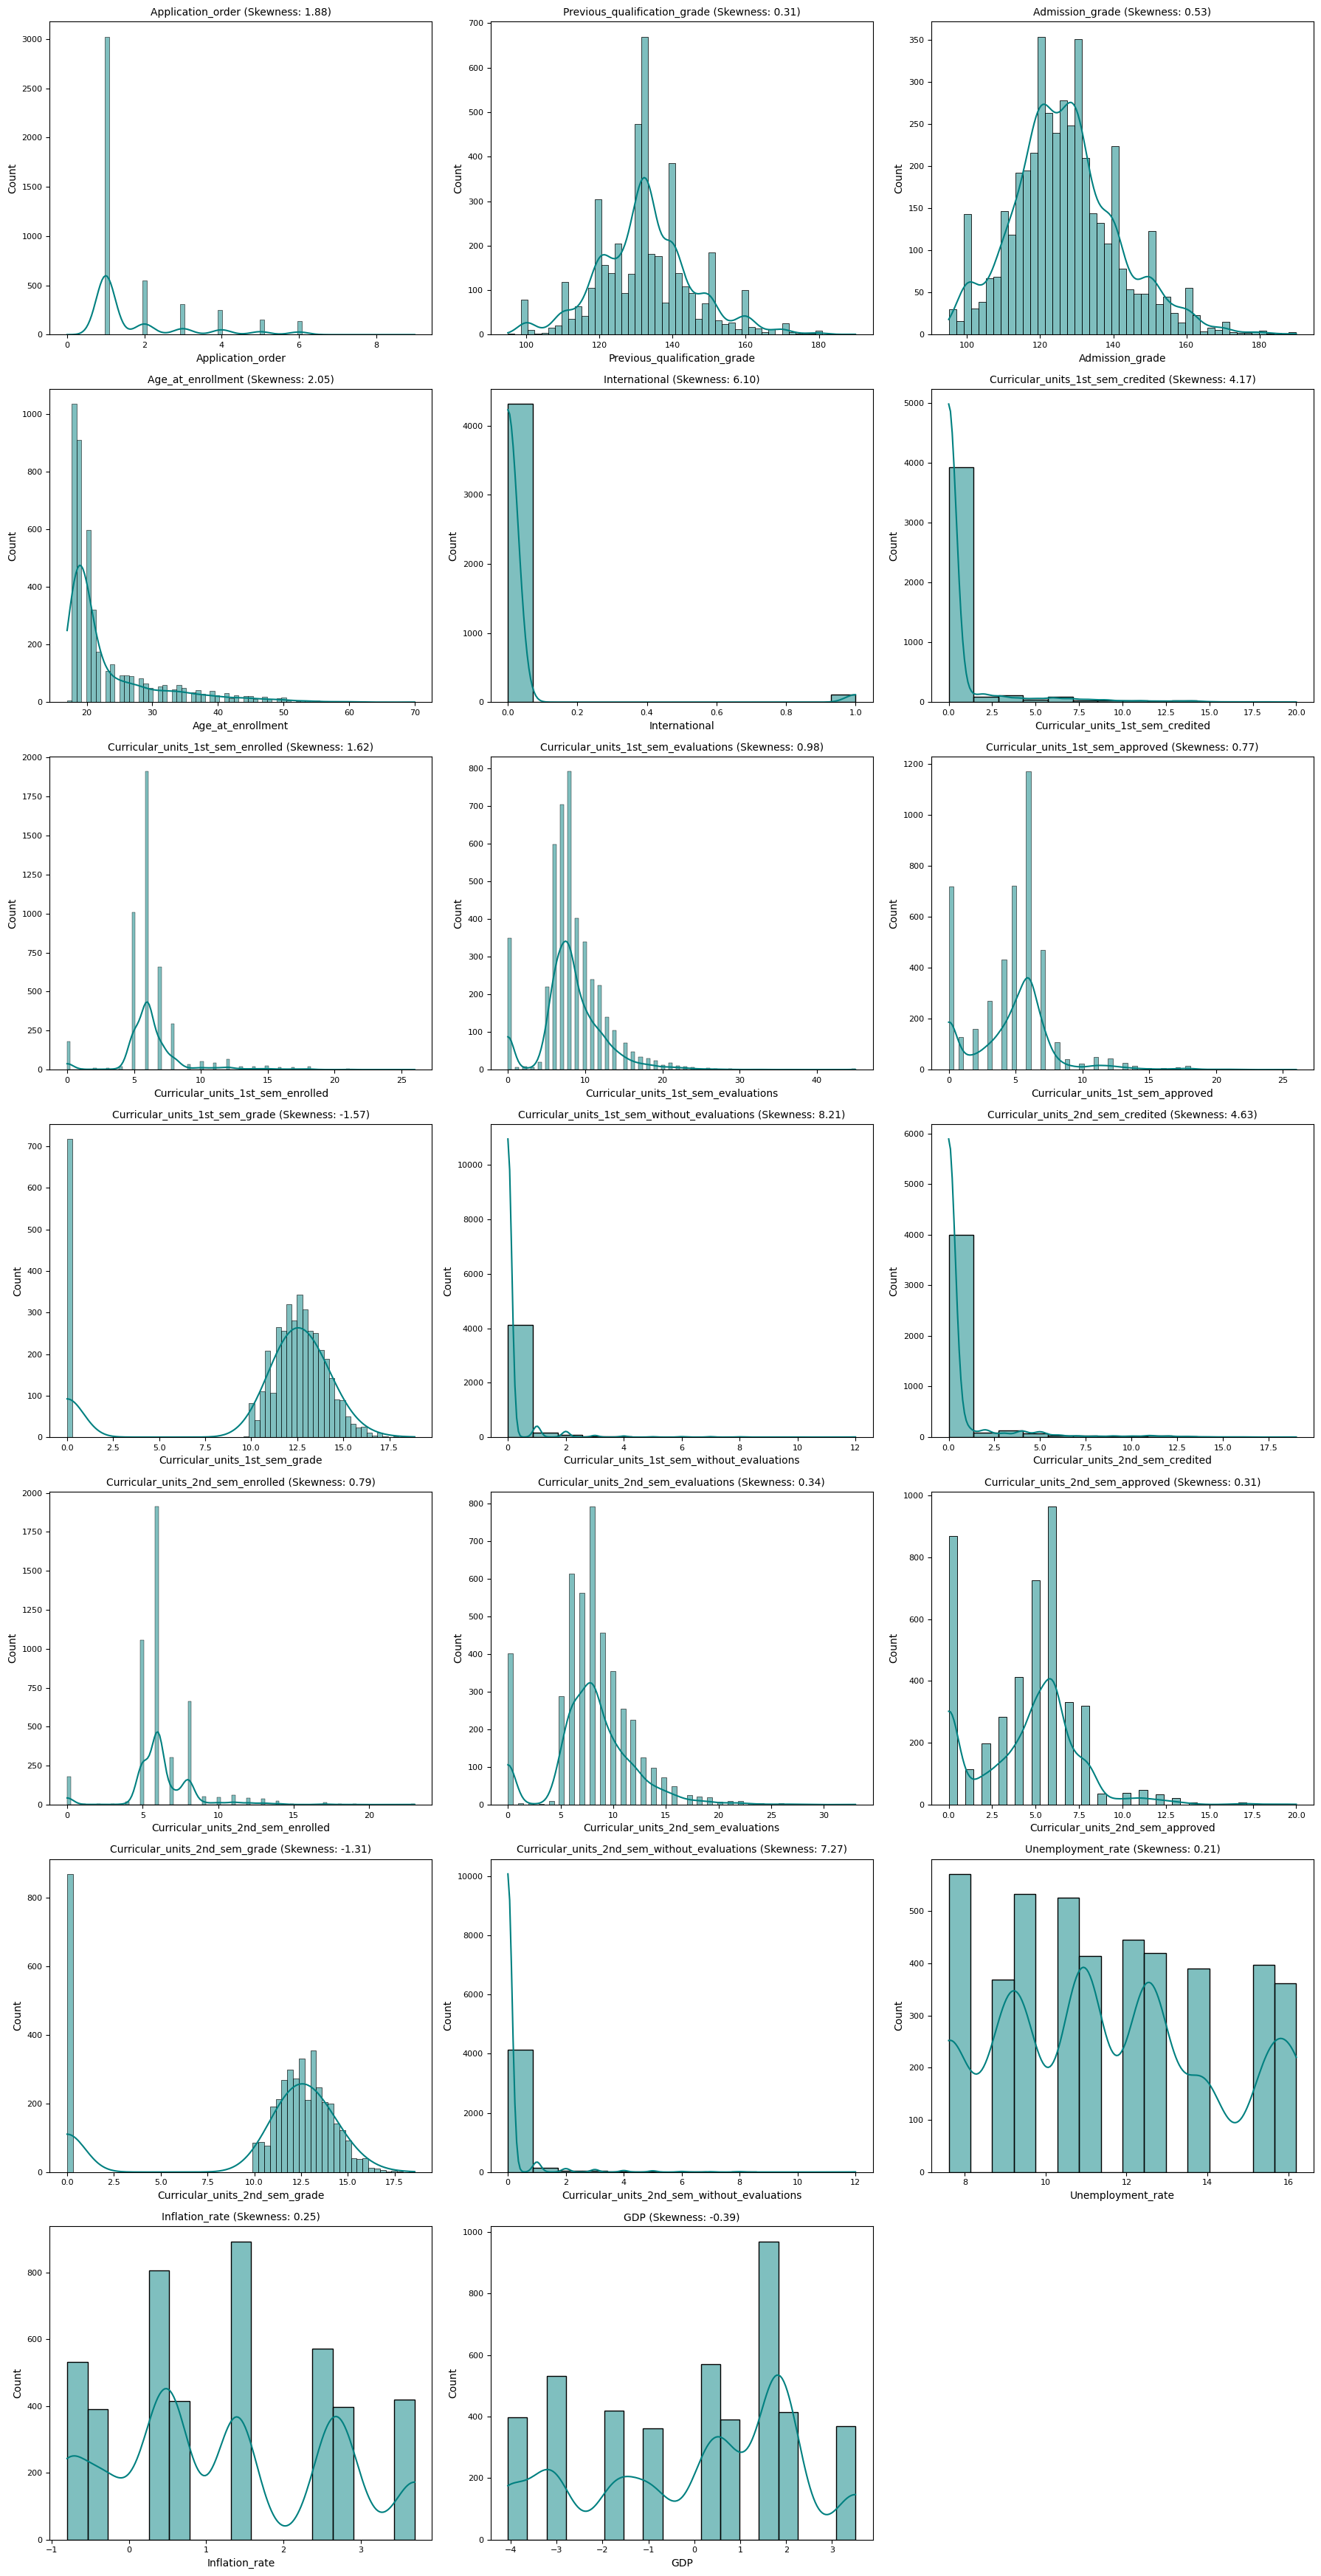

In [ ]:
# Menghitung jumlah kolom dan menyesuaikan grid untuk subplot
num_pos_numerical_cols = len(pos_numerical_features)
columns = 3
rows = (num_pos_numerical_cols + columns - 1) // columns

# Membuat subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(18, 5 * rows))

axes = axes.flatten()

# Loop untuk plotting setiap kolom numerik
for idx, column in enumerate(pos_numerical_features):
    ax = axes[idx]
    sns.histplot(Student_df[column], kde=True, ax=ax, color='teal')
    skew_value = Student_df[column].skew()
    ax.set_title(f'{column} (Skewness: {skew_value:.2f})', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

# Menghapus sumbu yang tidak digunakan jika jumlah subplot lebih banyak
if num_pos_numerical_cols < len(axes):
    for ax_idx in range(num_pos_numerical_cols, len(axes)):
        fig.delaxes(axes[ax_idx])

plt.tight_layout()
plt.show()

**Analisis dan Insight dari Grafik**

Berdasarkan grafik yang diberikan, berikut adalah analisis dan wawasan yang dapat diperoleh:
   - Banyak kolom memiliki nilai **skewness tinggi**, baik positif maupun negatif. Kolom seperti `International` (skewness: 6.10), `Curricular_units_1st_sem_without_evaluations` (skewness: 8.21), dan `Curricular_units_2nd_sem_without_evaluations` (skewness: 7.27) menunjukkan distribusi yang sangat **miring**. Ini menunjukkan bahwa sebagian besar nilai dalam kolom tersebut berkumpul di satu sisi, dan hanya sedikit data yang tersebar di sisi lain.
   - Kolom dengan **skewness negatif** (misalnya, `Curricular_units_1st_sem_grade` dengan skewness -1.57) menunjukkan distribusi dengan banyak nilai rendah dan hanya sedikit nilai tinggi.
   - Untuk kolom dengan **skewness positif** (seperti `Application_order` dengan skewness 1.88), ini menunjukkan distribusi yang cenderung memiliki nilai yang lebih tinggi di sisi kanan, dan sebagian besar data terkonsentrasi pada nilai rendah.
   - **Outliers jelas terlihat** pada beberapa kolom, seperti `Curricular_units_1st_sem_credited`, `Curricular_units_2nd_sem_credited`, dan `Curricular_units_1st_sem_without_evaluations`. Terdapat banyak nilai yang sangat tinggi (terlihat dari lonjakan pada sumbu x yang menunjukkan jumlah data tinggi pada nilai tertentu). Ini bisa menjadi indikasi bahwa ada beberapa mahasiswa yang memiliki banyak unit yang dikreditkan atau banyak unit tanpa evaluasi, yang bisa mempengaruhi analisis lebih lanjut.
   - Kolom seperti `International` juga menunjukkan banyak nilai yang terkonsentrasi di nilai 0, yang berarti sebagian besar mahasiswa adalah domestik.
   - **Inflasi dan GDP** memiliki distribusi yang lebih **teratur dan tidak terlalu skewed**. Namun, **`Inflation_rate`** menunjukkan adanya **fluktuasi musiman** yang teratur, yang bisa memberikan gambaran tentang tren inflasi selama beberapa periode.
   - **GDP** cenderung memiliki distribusi yang lebih **merata** dengan sedikit fluktuasi, yang bisa menunjukkan data yang lebih stabil dan terdistribusi.
   - Kolom seperti `Curricular_units_1st_sem_enrolled` dan `Curricular_units_1st_sem_evaluations` menunjukkan banyaknya mahasiswa yang terdaftar dan dievaluasi. Di sisi lain, ada juga kolom yang menunjukkan banyak mahasiswa yang tidak memiliki evaluasi, seperti `Curricular_units_1st_sem_without_evaluations`, yang memiliki distribusi sangat miring ke kanan.
   - **Tingkat pengangguran** menunjukkan fluktuasi, tetapi distribusinya relatif lebih stabil dibandingkan dengan fitur lain. Ini bisa menunjukkan bahwa tingkat pengangguran mungkin tidak berpengaruh besar pada beberapa fitur lainnya dalam dataset.



Cek Numerik feature Outliner

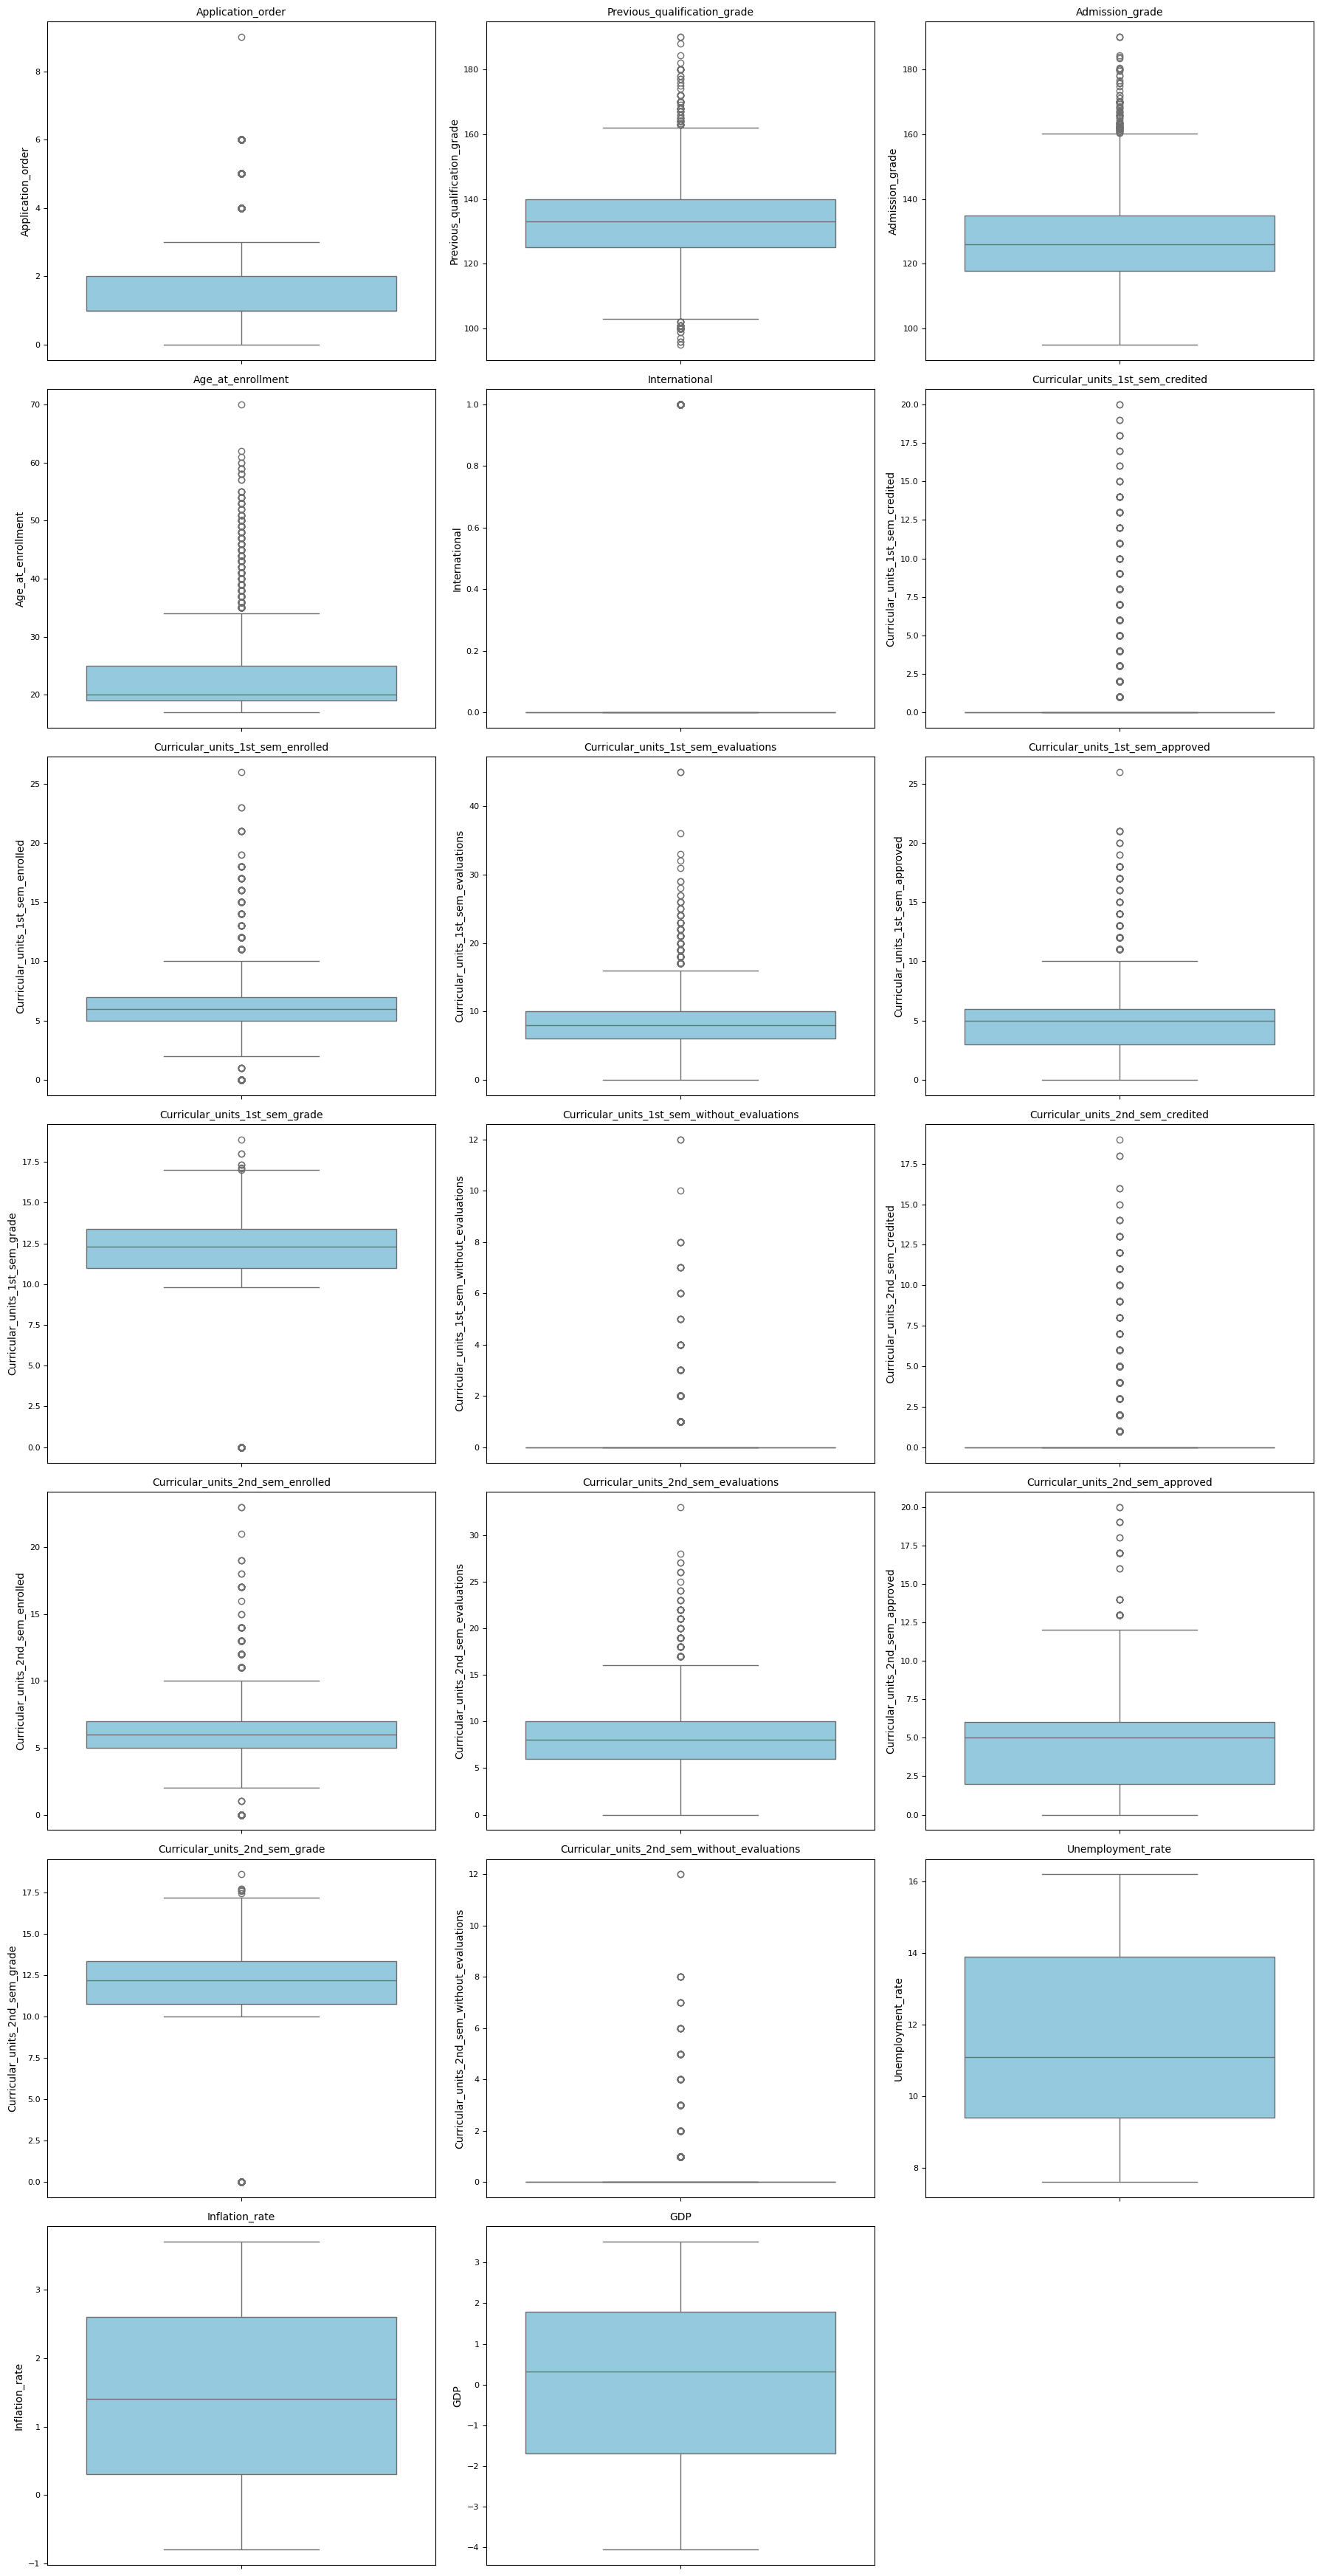

In [ ]:
# Menghitung jumlah kolom dan menyesuaikan grid untuk subplot
num_numerical_cols = len(pos_numerical_features)
columns = 3  # Menampilkan 3 chart per baris
rows = (num_numerical_cols + columns - 1) // columns

# Membuat subplots
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(18, 5 * rows))

axes = axes.flatten()

# Loop untuk plotting setiap kolom numerik
for idx, col in enumerate(pos_numerical_features):
    ax = axes[idx]
    sns.boxplot(y=Student_df[col], ax=ax, color='skyblue')
    ax.set_title(f'{col}', fontsize=10)
    ax.tick_params(axis='both', labelsize=8)

# Menghapus sumbu yang tidak digunakan jika jumlah subplot lebih banyak
if num_numerical_cols < len(axes):
    for ax_idx in range(num_numerical_cols, len(axes)):
        fig.delaxes(axes[ax_idx])

plt.tight_layout()
plt.show()

**Analisis dan Insight dari Boxplot**

Berdasarkan boxplot yang diberikan, berikut adalah analisis dan wawasan yang dapat diperoleh:

1. **Distribusi Kolom Numerik**
   - **`Application_order`, `Age_at_enrollment`, `International`** menunjukkan banyak **outliers** atau nilai ekstrim pada sumbu x. Kolom ini cenderung memiliki distribusi yang cukup menyebar, dengan banyak titik data yang tersebar di luar batasan interkuartil (IQR).
   
   - **`Previous_qualification_grade` dan `Admission_grade`** memiliki distribusi yang lebih terpusat, dengan **median** yang berada pada sekitar nilai yang lebih tinggi. Boxplot menunjukkan beberapa **outliers** di sisi kanan, yang menunjukkan adanya beberapa nilai yang jauh lebih tinggi daripada mayoritas data.

2. **Kolom dengan Banyak Nilai Ekstrem (Outliers)**
   - Kolom-kolom seperti **`Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_without_evaluations`**, dan **`Curricular_units_2nd_sem_credited`** memiliki nilai **outliers yang signifikan**. Ini mungkin menunjukkan bahwa ada sebagian kecil mahasiswa yang memiliki banyak unit yang dikreditkan atau banyak unit yang tidak dievaluasi.
   
   - **`Curricular_units_1st_sem_grade`** dan **`Curricular_units_2nd_sem_grade`** juga memiliki distribusi yang serupa, dengan banyak nilai yang terfokus pada nilai rendah hingga menengah, sementara beberapa nilai terjauh (outliers) berada pada batas atas.

3. **Distribusi yang Lebih Rata pada Kolom Makro Ekonomi**
   - **`Inflation_rate`** dan **`GDP`** menunjukkan distribusi yang lebih **merata dan tanpa outliers** besar. Kedua kolom ini lebih stabil dengan **median** yang menunjukkan nilai yang relatif konsisten tanpa banyak fluktuasi ekstrem, menunjukkan kondisi ekonomi yang lebih stabil dalam data ini.

4. **Tingkat Pengangguran**
   - **`Unemployment_rate`** juga memiliki distribusi yang lebih terpusat, tetapi terdapat beberapa **outliers** yang menunjukkan adanya fluktuasi tingkat pengangguran yang cukup besar pada beberapa titik data.

**Insight Umum:**
- **Outliers pada Kolom Kurikuler**: Banyak kolom seperti **`Curricular_units_1st_sem_credited`** dan **`Curricular_units_2nd_sem_credited`** memiliki banyak nilai ekstrim yang perlu diperiksa lebih lanjut. Outliers ini mungkin disebabkan oleh beberapa mahasiswa dengan jumlah unit yang sangat tinggi. Oleh karena itu, perlu dilakukan evaluasi apakah outliers ini perlu dipertahankan atau dihapus.
  
- **Distribusi Stabil pada Kolom Ekonomi**: Kolom **`Inflation_rate`** dan **`GDP`** menunjukkan distribusi yang lebih stabil, yang mengindikasikan tidak banyak fluktuasi dalam data terkait kondisi ekonomi selama periode pengamatan.

- **Data Kurikuler Memerlukan Perhatian**: Banyak kolom dengan jumlah unit kurikuler yang dievaluasi atau tanpa evaluasi perlu dianalisis lebih lanjut, karena ini dapat memengaruhi performa akademik mahasiswa secara keseluruhan dan memberi insight terkait kebijakan akademik atau evaluasi kurikulum.

Jika Anda ingin menangani outliers pada kolom tertentu, beberapa teknik seperti **IQR** atau **z-score** dapat digunakan untuk mengidentifikasi dan menghapus atau memodifikasi nilai-nilai ekstrim ini.


**Korelasi Nilai Numerik**

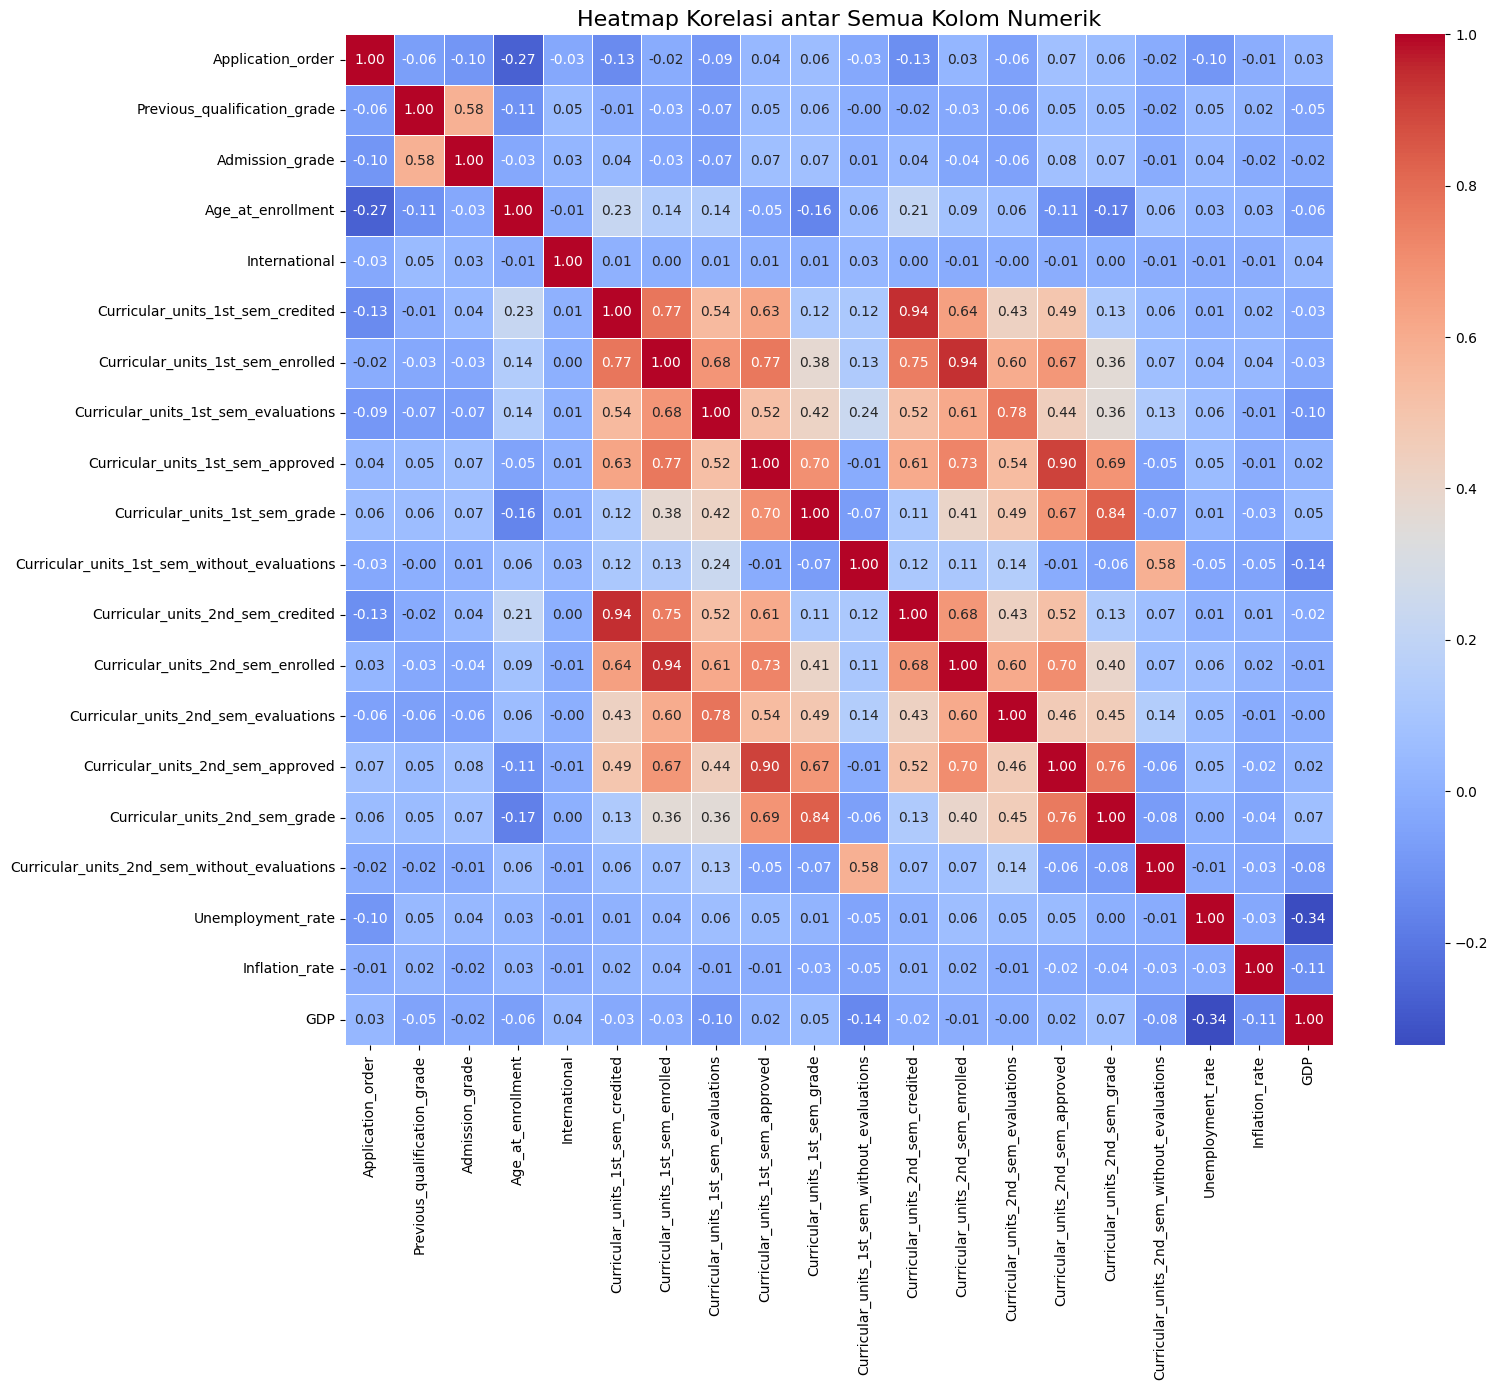

In [ ]:
# Pilih hanya kolom numerik
numerical_cols = Student_df.select_dtypes(include=np.number)

# Hitung matriks korelasi
correlation_matrix = numerical_cols.corr()

# Buat heatmap korelasi
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antar Semua Kolom Numerik', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Analisis dan Insight dari Heatmap Korelasi Antar Semua Kolom Numerik**

Heatmap ini menunjukkan korelasi antar berbagai kolom numerik dalam dataset. Korelasi diukur dengan nilai antara -1 dan 1, di mana:
- **1** menunjukkan korelasi positif sempurna,
- **-1** menunjukkan korelasi negatif sempurna,
- **0** menunjukkan tidak ada korelasi.

Berikut adalah analisis dan insight yang diperoleh dari heatmap:
   - **`Curricular_units_1st_sem_enrolled` dan `Curricular_units_1st_sem_credited`** memiliki korelasi **0.94**. Ini menunjukkan bahwa jumlah unit kurikuler yang diambil oleh mahasiswa di semester pertama sangat berkaitan dengan jumlah unit yang dikreditkan. Semakin banyak unit yang diambil, semakin banyak pula yang dikreditkan.
   - **`Curricular_units_1st_sem_enrolled` dan `Curricular_units_1st_sem_grade`** juga memiliki korelasi **0.84**, yang menunjukkan bahwa jumlah unit yang diambil di semester pertama berhubungan erat dengan nilai yang diperoleh.
   - **`Curricular_units_1st_sem_credited` dan `Curricular_units_2nd_sem_credited`** memiliki korelasi **0.52**, yang menunjukkan adanya hubungan moderat antara jumlah unit yang dikreditkan pada semester pertama dan kedua.
   - **`Curricular_units_1st_sem_approved` dan `Curricular_units_2nd_sem_approved`** memiliki korelasi **0.45**, yang juga menunjukkan hubungan moderat antar keduanya.
   - **`Curricular_units_2nd_sem_without_evaluations` dan `Unemployment_rate`** memiliki korelasi **-0.34**, yang mungkin menunjukkan bahwa adanya lebih banyak unit yang tidak dievaluasi di semester kedua berhubungan dengan penurunan tingkat pengangguran.
   - **`GDP` dan `Inflation_rate`** memiliki korelasi **-0.34**, yang menunjukkan hubungan negatif antara inflasi dan produk domestik bruto, meskipun korelasinya tidak terlalu kuat.
   - **`Application_order` dan `Curricular_units_1st_sem_credited`** memiliki korelasi yang sangat rendah **0.02**, yang menunjukkan bahwa urutan aplikasi tidak berhubungan dengan jumlah unit yang dikreditkan di semester pertama.
   - **`Previous_qualification_grade` dan `Unemployment_rate`** memiliki korelasi sangat rendah **-0.01**, yang menunjukkan bahwa nilai kualifikasi sebelumnya tidak terlalu berpengaruh pada tingkat pengangguran.
   - **Keterkaitan Antara Unit yang Diambil dan Diperoleh**: Kolom yang terkait dengan unit kurikuler menunjukkan hubungan yang sangat kuat satu sama lain, terutama antara unit yang diambil, yang dikreditkan, dan yang disetujui. Hal ini menunjukkan bahwa mahasiswa yang terlibat lebih banyak dalam mata kuliah dan memenuhi persyaratan untuk unit lebih cenderung berhasil.
   - **Pengaruh Pengangguran dan Ekonomi**: Meskipun ada beberapa korelasi negatif antara pengangguran, inflasi, dan GDP, korelasi ini tidak terlalu kuat. Namun, hubungan ini bisa memberi wawasan lebih lanjut tentang bagaimana faktor ekonomi mempengaruhi pendidikan.
   - **Faktor Eksternal dan Internal**: Kolom seperti `Application_order` menunjukkan tidak ada korelasi signifikan dengan kolom-kolom lainnya, yang bisa menjadi area yang menarik untuk dianalisis lebih lanjut dalam konteks faktor eksternal yang mungkin mempengaruhi pendaftaran mahasiswa.



##### Kategorikal feature

Histogram Categorical features

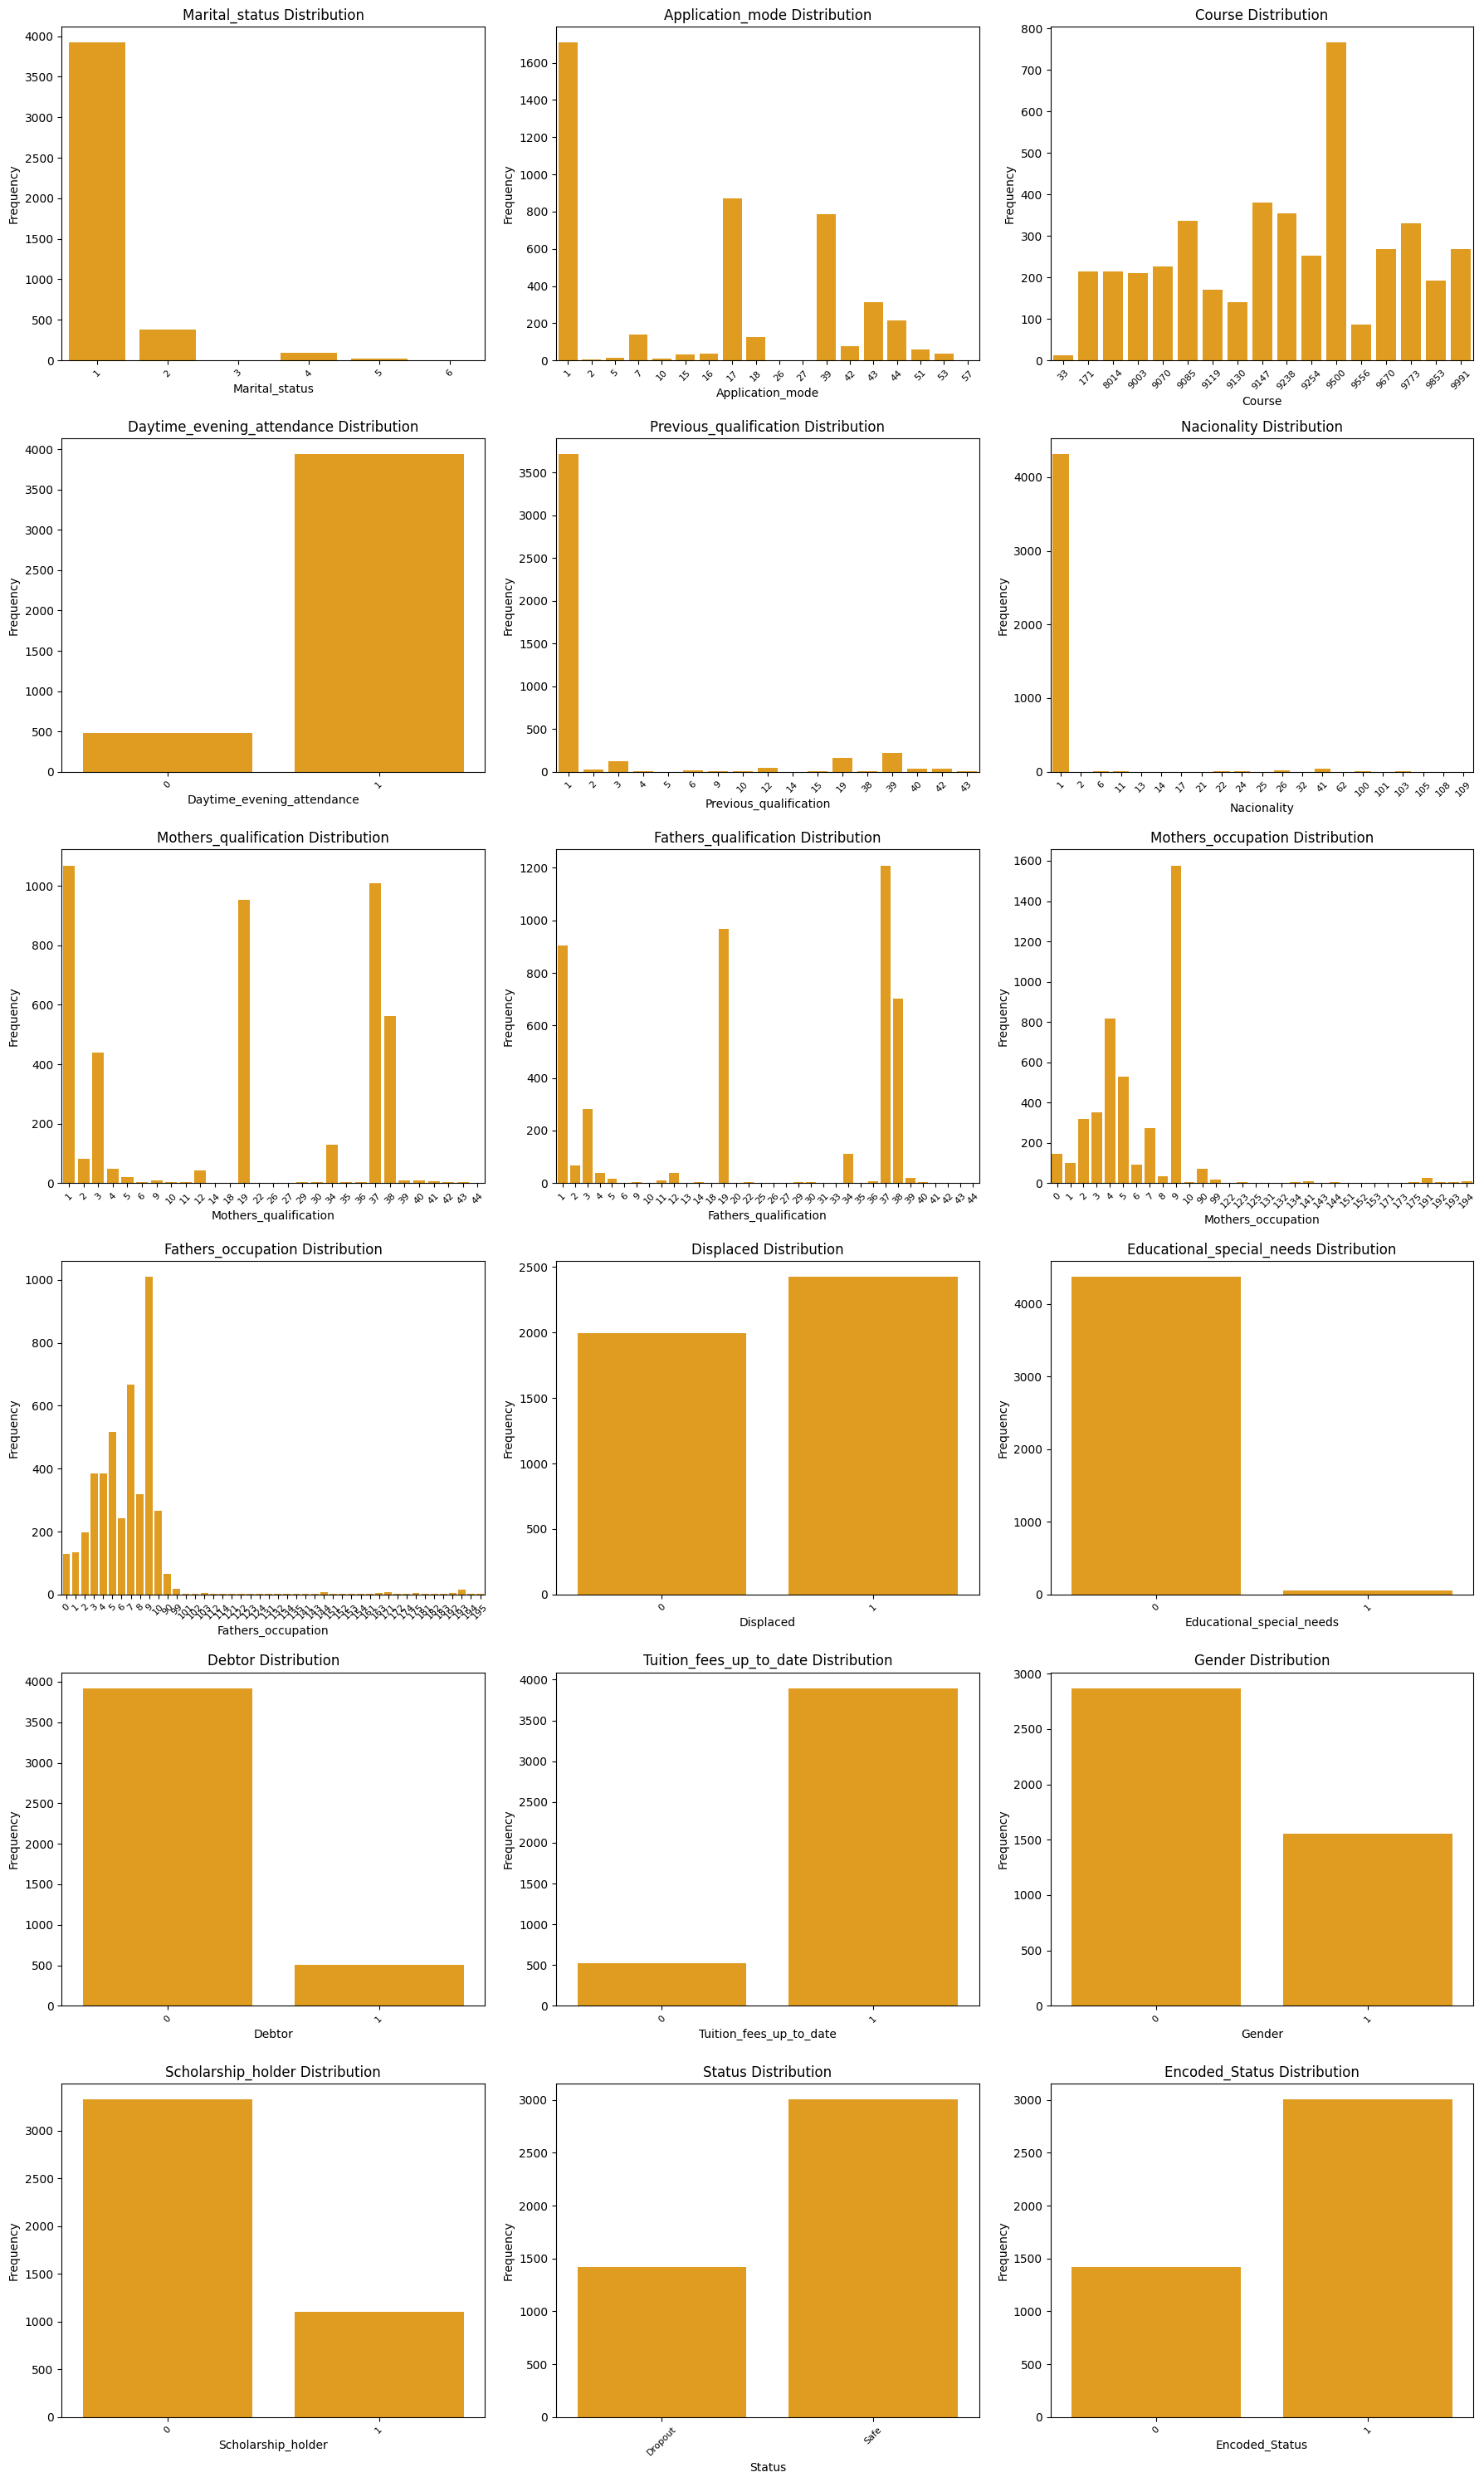

In [ ]:
# make function
def plot_categorical_distribution(df, categorical_columns, charts_per_row=3):
    num_cols = len(categorical_columns)
    num_rows = (num_cols // charts_per_row) + (1 if num_cols % charts_per_row else 0)

    # Setup figure size dynamically based on number of rows and columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=charts_per_row, figsize=(charts_per_row * 6, num_rows * 5))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_columns):
        # Create the bar plot for the categorical feature
        ax = axes[idx]
        category_counts = df[col].value_counts()
        sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax, color='orange')  # Changed color to orange

        ax.set_title(f'{col} Distribution', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)

    # Remove unused subplots if necessary
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# call function
plot_categorical_distribution(Student_df, pos_categorical_features)

**Analisis dan Insight dari Grafik Bar Kategorikal**

Berdasarkan grafik yang diberikan, berikut adalah beberapa analisis dan wawasan yang dapat diperoleh dari distribusi kolom kategorikal dalam dataset:

1. **Distribusi Status Pernikahan (`Marital_status`)**
   - Kolom `Marital_status` menunjukkan dominasi **lajang** (kategori 1) dengan frekuensi yang sangat tinggi dibandingkan kategori lainnya. Hal ini menunjukkan bahwa sebagian besar mahasiswa dalam dataset belum menikah.
   
2. **Distribusi Mode Pendaftaran (`Application_mode`)**
   - `Application_mode` menunjukkan bahwa mayoritas pendaftaran menggunakan mode tertentu, dengan **beberapa kategori** memiliki frekuensi rendah. Ini mungkin mencerminkan pendaftaran mahasiswa dengan cara yang lebih standar atau tradisional dibandingkan mode lainnya.

3. **Distribusi Program Studi (`Course`)**
   - Kolom `Course` menunjukkan distribusi yang cukup tersebar dengan beberapa program studi memiliki jumlah mahasiswa yang jauh lebih banyak dibandingkan lainnya. Hal ini menunjukkan ketidakseimbangan dalam pemilihan program studi di kalangan mahasiswa.

4. **Distribusi Kualifikasi Sebelumnya (`Previous_qualification`)**
   - Terdapat dominasi **kualifikasi tingkat menengah (secondary)**, yang menunjukkan bahwa sebagian besar mahasiswa memiliki latar belakang pendidikan menengah.

5. **Distribusi Kewarganegaraan (`Nationality`)**
   - Kolom `Nationality` menunjukkan bahwa sebagian besar mahasiswa berasal dari satu kewarganegaraan, dengan sedikit mahasiswa internasional, yang tercermin dari frekuensi yang sangat rendah pada kategori internasional.

6. **Distribusi Kualifikasi Ibu dan Ayah (`Mothers_qualification`, `Fathers_qualification`)**
   - Kolom-kolom ini menunjukkan bahwa sebagian besar orang tua memiliki kualifikasi **tingkat menengah atau sarjana**. Ini menunjukkan latar belakang pendidikan orang tua yang cukup tinggi.

7. **Distribusi Pekerjaan Orang Tua (`Mothers_occupation`, `Fathers_occupation`)**
   - Kolom-kolom ini menunjukkan bahwa sebagian besar ibu dan ayah mahasiswa bekerja di bidang pendidikan atau sebagai tenaga profesional lainnya, meskipun terdapat kategori pekerjaan lain dengan jumlah yang lebih sedikit.

8. **Distribusi Status Displaced (`Displaced`)**
   - Kolom `Displaced` menunjukkan **ketidakseimbangan** yang jelas, di mana hampir semua mahasiswa bukan berasal dari latar belakang terdisplaced. Ini menunjukkan bahwa mayoritas mahasiswa berasal dari keluarga yang tidak mengalami perpindahan tempat tinggal atau pengungsian.

9. **Distribusi Kebutuhan Pendidikan Khusus (`Educational_special_needs`)**
   - Kolom `Educational_special_needs` menunjukkan bahwa hanya sebagian kecil mahasiswa yang membutuhkan pendidikan khusus. Ini mengindikasikan bahwa mayoritas mahasiswa tidak memerlukan dukungan pendidikan tambahan.

10. **Distribusi Status Pembayaran (`Debtor`)**
   - Kolom `Debtor` menunjukkan bahwa sebagian besar mahasiswa **tidak berutang** (kategori 0). Ini bisa menunjukkan bahwa sebagian besar mahasiswa memiliki keadaan finansial yang baik, atau mereka belum terjebak dalam hutang pendidikan.

11. **Distribusi Pembayaran Biaya Kuliah (`Tuition_fees_up_to_date`)**
   - Mayoritas mahasiswa **memiliki pembayaran biaya kuliah yang terupdate**. Hanya sedikit mahasiswa yang tertunggak dalam pembayaran biaya kuliah.

12. **Distribusi Jenis Kelamin (`Gender`)**
   - Kolom `Gender` menunjukkan dominasi jenis kelamin **laki-laki**, meskipun jumlah mahasiswa perempuan juga signifikan, namun dengan frekuensi yang lebih rendah.

13. **Distribusi Beasiswa (`Scholarship_holder`)**
   - Kolom `Scholarship_holder` menunjukkan bahwa sebagian besar mahasiswa **bukan penerima beasiswa**, dengan jumlah penerima beasiswa yang lebih sedikit.

14. **Distribusi Status Akhir (`Status`)**
   - Kolom `Status` menunjukkan bahwa mayoritas mahasiswa **lulus** (kategori 1), dengan jumlah mahasiswa yang drop-out jauh lebih sedikit.

15. **Distribusi Status yang Terenkripsi (`Encoded_Status`)**
   - Kolom `Encoded_Status` mencerminkan hasil dari encoding yang dilakukan pada kolom `Status`, di mana angka 0 menunjukkan mahasiswa yang **drop-out** dan angka 1 menunjukkan mahasiswa yang **lulus**.




**Pie chart categorical feature**

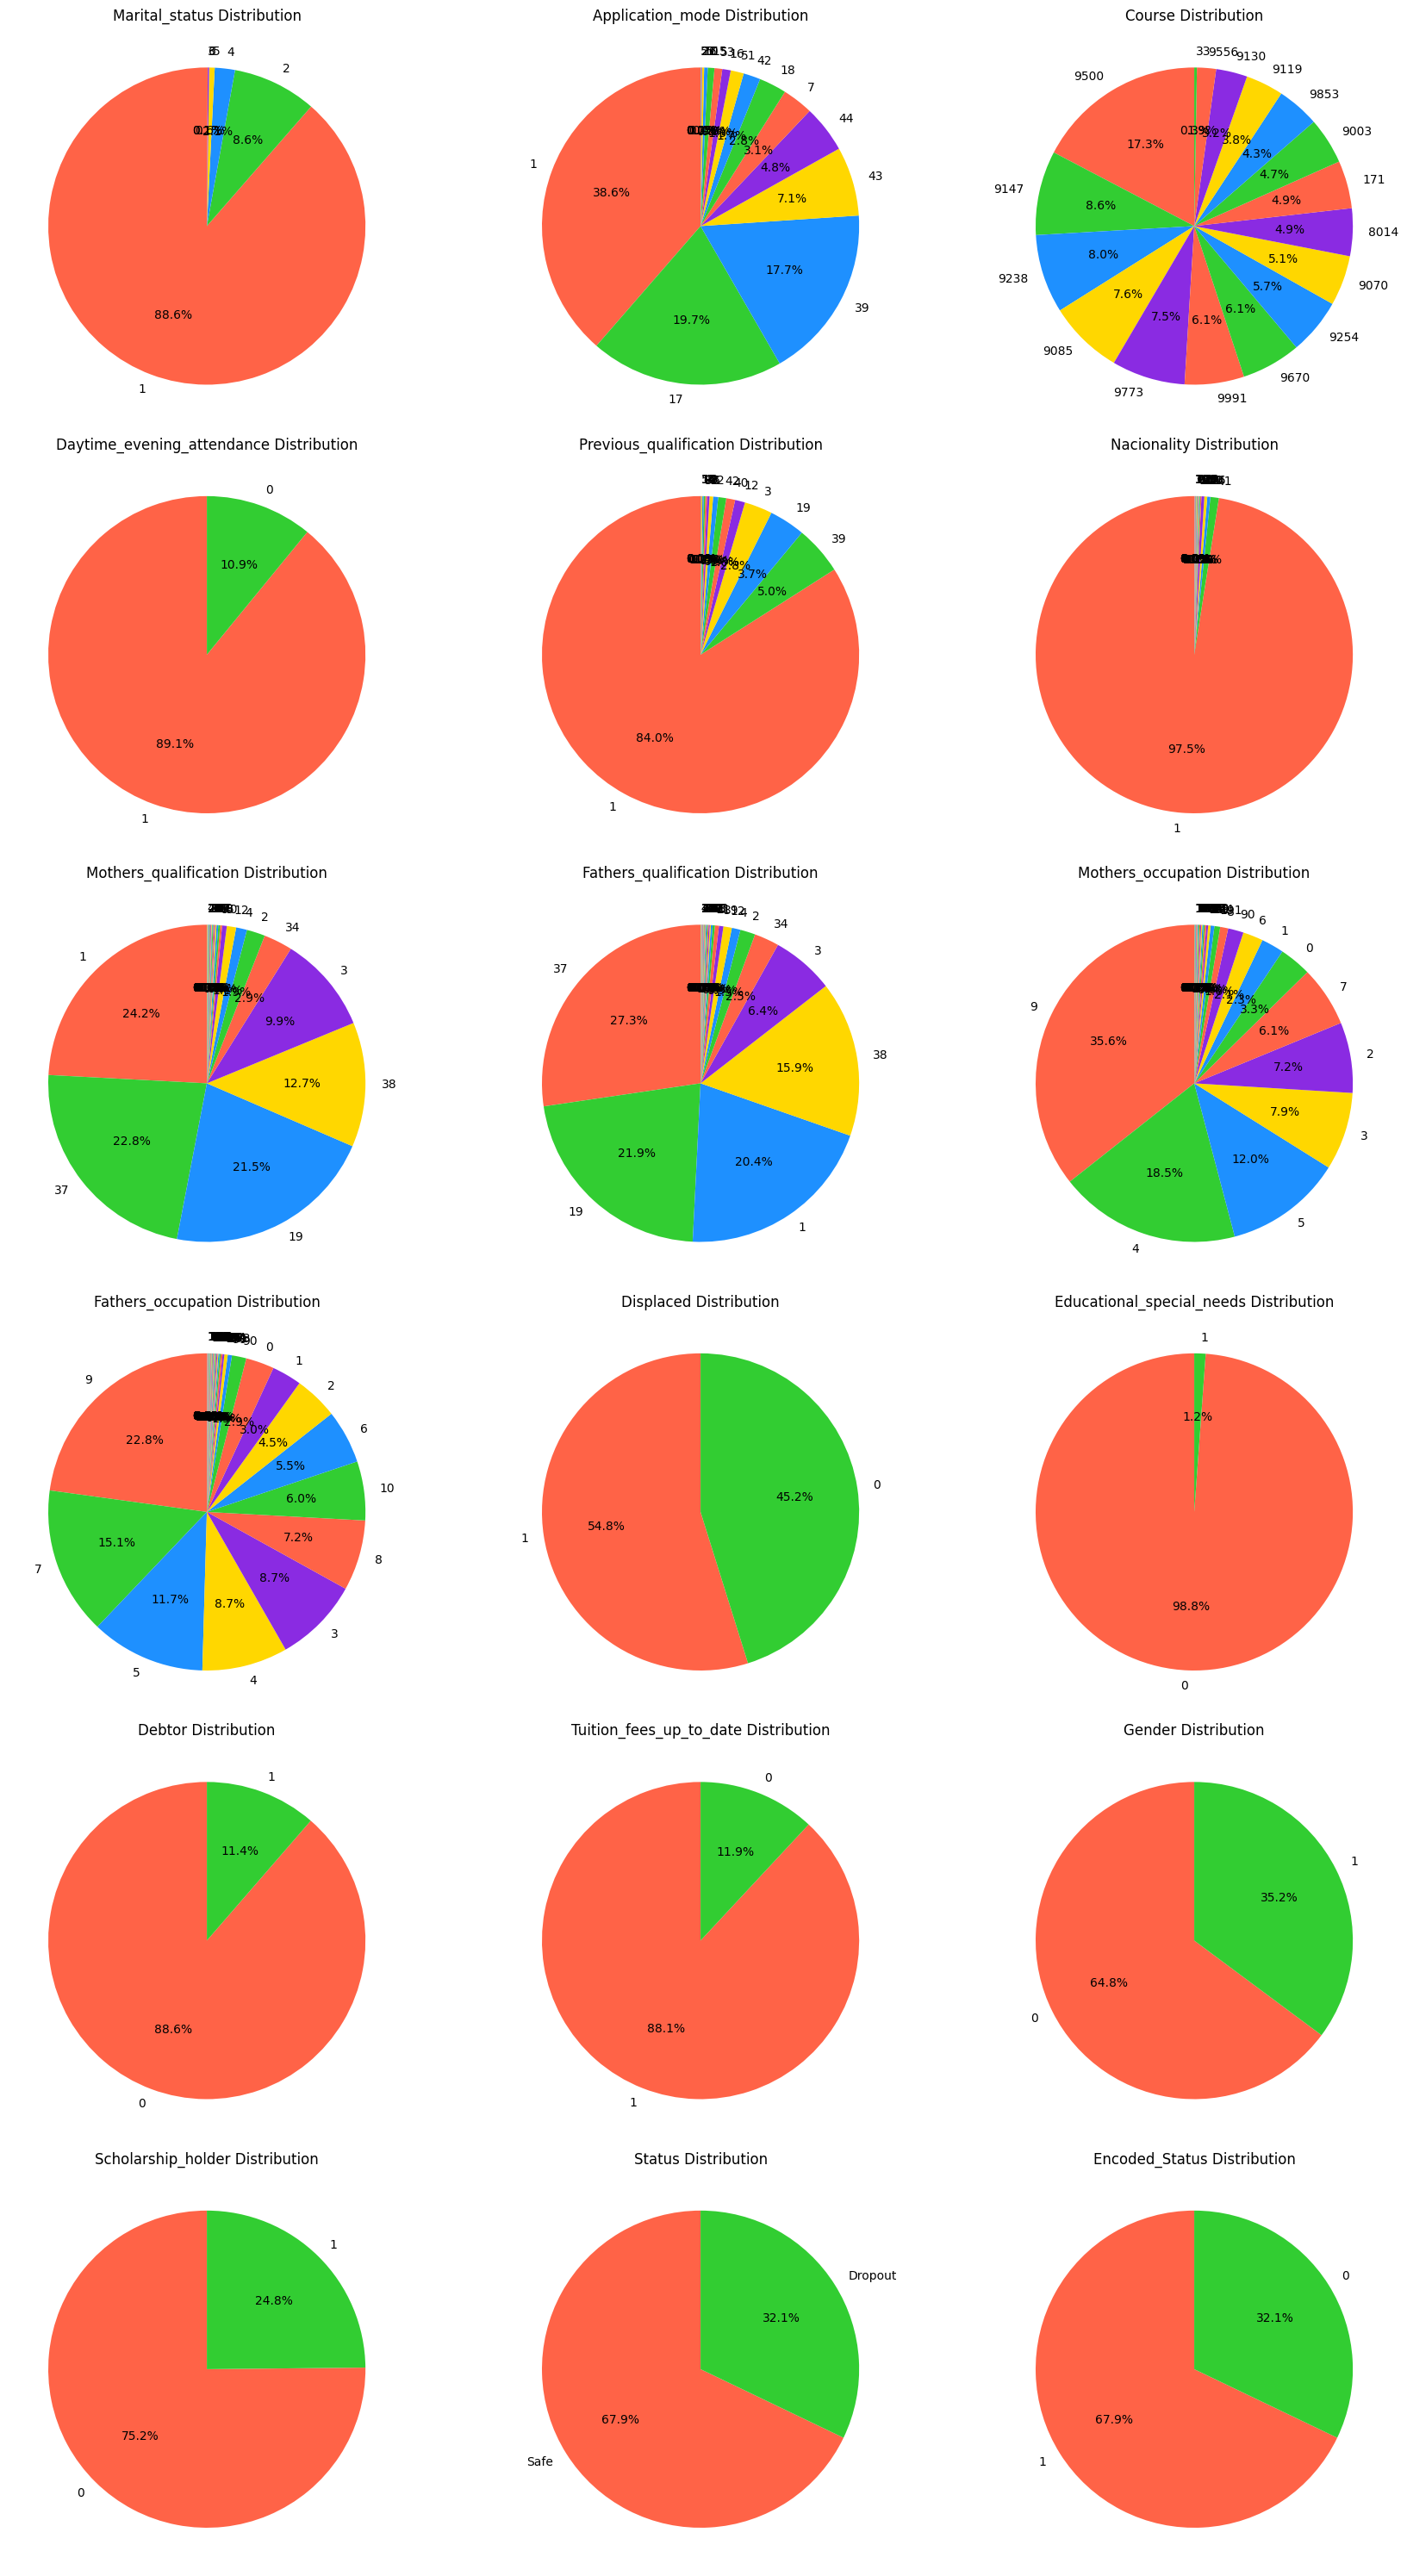

In [ ]:
# Make Function
def plot_pie_charts(df, categorical_columns, charts_per_row=3):
    total_cols = len(categorical_columns)
    total_rows = (total_cols + charts_per_row - 1) // charts_per_row

    # Setup figure size dynamically based on number of rows and columns
    fig, axes = plt.subplots(nrows=total_rows, ncols=charts_per_row, figsize=(charts_per_row * 6, total_rows * 5))
    axes = axes.flatten()

    for idx, col in enumerate(categorical_columns):
        ax = axes[idx]
        # Menghitung frekuensi kategori
        category_counts = df[col].value_counts()
        labels = category_counts.index
        sizes = category_counts.values

        # Mengatur warna untuk pie chart
        colors = ['#FF6347', '#32CD32', '#1E90FF', '#FFD700', '#8A2BE2']

        # Membuat pie chart dengan warna yang berbeda
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors[:len(labels)])
        ax.set_title(f'{col} Distribution', fontsize=12)

    # Menghapus subplot yang tidak digunakan jika jumlah kolom kurang dari subplot yang tersedia
    for j in range(total_cols, len(axes)):
        fig.delaxes(axes[j])

    # Menata layout agar lebih rapi
    plt.tight_layout()
    plt.show()

# Call fungsi
plot_pie_charts(Student_df, pos_categorical_features)


**Analisis dan Insight dari Pie Chart Kategorikal**

Berdasarkan pie chart yang diberikan, berikut adalah analisis dan wawasan yang dapat diperoleh dari distribusi berbagai kolom kategorikal dalam dataset:

1. **Distribusi Status Pernikahan (`Marital_status`)**
   - **Dominasi**: Sebagian besar mahasiswa adalah **lajang** (kategori 1) dengan persentase mencapai 88.6%. Hanya sebagian kecil mahasiswa yang berada dalam kategori lainnya, seperti menikah (kategori 2).

2. **Distribusi Mode Pendaftaran (`Application_mode`)**
   - **Dominasi Mode Pendaftaran Tertentu**: Sebagian besar mahasiswa menggunakan mode **pendaftaran tertentu**, dengan kategori terbesar mencapai sekitar 38.6%. Ini menunjukkan adanya mode pendaftaran yang lebih dominan daripada lainnya.

3. **Distribusi Program Studi (`Course`)**
   - **Distribusi yang Beragam**: Program studi menunjukkan distribusi yang cukup beragam, namun sebagian besar mahasiswa berada pada beberapa program studi dengan frekuensi yang jauh lebih tinggi, misalnya pada program studi dengan kode **9003** yang menunjukkan sekitar 17.3%.

4. **Distribusi Kualifikasi Sebelumnya (`Previous_qualification`)**
   - **Latar Belakang Pendidikan Menengah**: Sebagian besar mahasiswa datang dengan **kualifikasi pendidikan menengah** (kategori 1) dengan persentase 84%. Ini menunjukkan bahwa mayoritas mahasiswa memiliki latar belakang pendidikan menengah sebelum melanjutkan ke perguruan tinggi.

5. **Distribusi Kewarganegaraan (`Nationality`)**
   - **Dominasi Kewarganegaraan Lokal**: Sebagian besar mahasiswa berasal dari kewarganegaraan yang sama (kategori 0) dengan persentase mencapai 97.5%, menandakan mayoritas mahasiswa adalah domestik, dan hanya sedikit yang berasal dari luar negeri.

6. **Distribusi Kualifikasi Ibu dan Ayah (`Mothers_qualification`, `Fathers_qualification`)**
   - **Kualifikasi Pendidikan Orang Tua**: Kolom-kolom ini menunjukkan bahwa sebagian besar ibu dan ayah mahasiswa memiliki latar belakang pendidikan yang lebih tinggi, dengan beberapa kategori seperti **sarjana** dan **magister** menjadi dominan.

7. **Distribusi Pekerjaan Ibu dan Ayah (`Mothers_occupation`, `Fathers_occupation`)**
   - **Pekerjaan Profesional**: Sebagian besar ibu dan ayah bekerja di profesi yang lebih mapan, meskipun terdapat kategori pekerjaan lain dengan frekuensi lebih rendah.

8. **Distribusi Status Displaced (`Displaced`)**
   - **Kebanyakan Mahasiswa Tidak Displaced**: Sebagian besar mahasiswa **bukan berasal dari latar belakang displaced** (kategori 0), hanya sedikit mahasiswa yang berasal dari latar belakang displaced.

9. **Distribusi Kebutuhan Pendidikan Khusus (`Educational_special_needs`)**
   - **Hanya Beberapa Mahasiswa yang Memiliki Kebutuhan Khusus**: Mayoritas mahasiswa **tidak memerlukan pendidikan khusus** dengan hanya 1.2% mahasiswa yang membutuhkan pendidikan khusus.

10. **Distribusi Status Pembayaran (`Debtor`)**
   - **Mayoritas Tidak Berutang**: Sebagian besar mahasiswa **bukan debitur** (kategori 0), hanya 11.4% yang berutang.

11. **Distribusi Pembayaran Biaya Kuliah (`Tuition_fees_up_to_date`)**
   - **Pembayaran Biaya Kuliah Tepat Waktu**: Sebagian besar mahasiswa **memiliki pembayaran biaya kuliah yang tepat waktu**, dengan 88.1% mahasiswa membayar tepat waktu.

12. **Distribusi Jenis Kelamin (`Gender`)**
   - **Dominasi Laki-laki**: Distribusi menunjukkan dominasi jenis kelamin **laki-laki** (64.8%), dengan **perempuan** memiliki persentase lebih rendah (35.2%).

13. **Distribusi Penerima Beasiswa (`Scholarship_holder`)**
   - **Sebagian Besar Mahasiswa Tidak Menerima Beasiswa**: 75.2% mahasiswa **bukan penerima beasiswa**, hanya 24.8% yang mendapatkan beasiswa.

14. **Distribusi Status Akhir (`Status`)**
   - **Sebagian Besar Mahasiswa Lulus**: Sebagian besar mahasiswa **lulus** (kategori 1), dengan 67.9% mahasiswa lulus dan 32.1% yang drop-out.

15. **Distribusi Status Terenkripsi (`Encoded_Status`)**
   - **Hasil Encoding**: Kolom `Encoded_Status` menunjukkan hasil encoding dari kolom `Status`, di mana kategori 1 menunjukkan **lulus** dan kategori 0 menunjukkan **drop-out**.

**Insight Utama:**
- **Keseimbangan dalam Distribusi**: Banyak fitur menunjukkan ketidakseimbangan yang signifikan, seperti **status pernikahan**, **kewarganegaraan**, **status pembayaran biaya kuliah**, dan **kebutuhan pendidikan khusus**. Misalnya, sebagian besar mahasiswa memiliki status pernikahan lajang, berasal dari kewarganegaraan yang sama, dan memiliki biaya kuliah yang terbayar tepat waktu.
- **Fitur Ekonomi dan Pembayaran**: Kolom **`Debtor`** dan **`Tuition_fees_up_to_date`** memberikan gambaran bahwa mayoritas mahasiswa tidak berutang dan memiliki pembayaran biaya kuliah yang tepat waktu.
- **Mahasiswa Lulus**: Sebagian besar mahasiswa **lulus**, namun sekitar 32.1% mahasiswa drop-out, yang bisa menjadi area untuk dianalisis lebih lanjut mengenai faktor-faktor yang berkontribusi pada angka drop-out.



## Modeling

In [ ]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nacionality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

#### Set Terget data

X=fitur
, Y=target

In [ ]:
X_var = ['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'GDP']

In [ ]:
 Y_var = ['Encoded_Status']

In [ ]:
All_var = X_var + Y_var

Konversi fitur ``All_var`` ke numeric

In [ ]:
def convert_columns_to_integer(df, columns_to_convert):
    for column in columns_to_convert:
        if column in df.columns:
            try:
                # Mengubah kolom kategori menjadi kode numerik
                if df[column].dtype.name == 'category':
                    df[column] = df[column].cat.codes

                # Mengonversi kolom menjadi integer
                df[column] = df[column].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

            except ValueError:
                print(f"Kolom '{column}' tidak dapat diubah menjadi tipe integer. Terdapat data yang tidak dapat diproses.")
        else:
            print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

# Menggunakan fungsi untuk mengonversi kolom
convert_columns_to_integer(Student_df, All_var)


Standarisasi

In [ ]:
def scale_and_split_data(data, feature_columns, target_column):
    # Memisahkan fitur dan target
    features = data[feature_columns]
    target = data[target_column]

    # Membagi data menjadi train dan test
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Membuat objek StandardScaler
    scaler = StandardScaler()

    # Melakukan fitting pada data latih dan transformasi pada data uji
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Mengonversi kembali hasil scaling ke dalam DataFrame
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    # Menyimpan Scaler
    try:
        with open('saved_scaler.pkl', 'wb') as file:
            pickle.dump(scaler, file)
        print("Scaler berhasil disimpan sebagai 'saved_scaler.pkl'.")

        # Mengecek ukuran file scaler
        scaler_file_size = os.path.getsize('saved_scaler.pkl')
        print(f"Ukuran file scaler: {scaler_file_size} bytes")
        if scaler_file_size == 0:
            print("PERINGATAN: Ukuran file scaler adalah 0 bytes!")
    except Exception as error:
        print(f"Terjadi kesalahan saat menyimpan scaler: {error}")

    return X_train_scaled_df, X_test_scaled_df, y_train, y_test

In [ ]:
# Menggunakan fungsi untuk menstandarisasi dan membagi data
X_train_scaled, X_test_scaled, Y_train, Y_test = scale_and_split_data(Student_df.copy(), X_var , Y_var)

# Menampilkan beberapa baris pertama dari data yang telah distandarisasi
print("Data Training yang Telah Distandarisasi:")
print(X_train_scaled.head())

print("\nData Testing yang Telah Distandarisasi:")
print(X_test_scaled.head())

print("\nTarget Data Training:")
print(Y_train.head())

print("\nTarget Data Testing:")
print(Y_test.head())

Scaler berhasil disimpan sebagai 'saved_scaler.pkl'.
Ukuran file scaler: 2036 bytes
Data Training yang Telah Distandarisasi:
      Marital_status  Application_mode  Application_order    Course  \
3383        4.769153         -0.552460          -0.557496 -0.198678   
2840       -0.294763          0.962870          -0.557496 -0.887562   
564        -0.294763         -1.120708           3.236694 -1.117190   
1786        1.393209          0.962870          -0.557496  0.030950   
3900       -0.294763         -1.120708           0.960180  0.490206   

      Daytime_evening_attendance  Previous_qualification  \
3383                     0.35848                0.132611   
2840                     0.35848               -0.379736   
564                      0.35848                0.901132   
1786                     0.35848                2.438174   
3900                     0.35848               -0.379736   

      Previous_qualification_grade  Mothers_qualification  \
3383                     -

####buat model

In [ ]:
# Inisialisasi model-model yang akan dicoba
XGBoost = XGBClassifier(random_state=42)
LightGBM = LGBMClassifier(random_state=42)
GradientBoosting = GradientBoostingClassifier(random_state=42)

## Evaluation

In [ ]:
# Menyimpan hasil evaluasi untuk setiap model
evaluation_results = {}

# List of models to evaluate
models = {
    'XGBoost': XGBoost,
    'LightGBM': LightGBM,
    'Gradient Boosting': GradientBoosting
}

# Melatih, mengevaluasi, dan memilih model dengan akurasi terbaik
best_model = None
best_accuracy = 0

for model_name, model_instance in models.items():
    # Melatih model dengan data latih
    model_instance.fit(X_train_scaled, Y_train)

    # Menggunakan model untuk prediksi pada data uji
    predictions = model_instance.predict(X_test_scaled)

    # Menghitung akurasi model
    model_accuracy = accuracy_score(Y_test, predictions)

    # Menghitung confusion matrix
    conf_matrix = confusion_matrix(Y_test, predictions)

    # Menghitung precision, recall, dan f1-score
    class_report = classification_report(Y_test, predictions, output_dict=True)

    # Menyimpan hasil evaluasi ke dalam dictionary
    evaluation_results[model_name] = {
        'accuracy': model_accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

    # Menyimpan model yang memiliki akurasi tertinggi
    if model_accuracy > best_accuracy:
        best_accuracy = model_accuracy
        best_model = model_instance

    # Menampilkan confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(conf_matrix)
    print("-" * 50)

    # Menampilkan precision, recall, f1-score
    print(f"Classification Report for {model_name}:")
    print(classification_report(Y_test, predictions))
    print("-" * 50)

# Menampilkan hasil evaluasi untuk setiap model
for model_name, results in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{results['confusion_matrix']}")
    print(f"Classification Report:\n{results['classification_report']}")
    print("-" * 50)

# Menyimpan model dengan akurasi tertinggi
if best_model:
    model_filename = "best_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model {best_model} dengan akurasi tertinggi disimpan sebagai {model_filename}")
else:
    print("Tidak ada model yang disimpan karena akurasi model terlalu rendah.")

Confusion Matrix for XGBoost:
[[226  90]
 [ 42 527]]
--------------------------------------------------
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       316
           1       0.85      0.93      0.89       569

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.85       885

--------------------------------------------------
[LightGBM] [Info] Number of positive: 2434, number of negative: 1105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.687765 -> ini

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Confusion Matrix for LightGBM:
[[232  84]
 [ 38 531]]
--------------------------------------------------
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       316
           1       0.86      0.93      0.90       569

    accuracy                           0.86       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix for Gradient Boosting:
[[231  85]
 [ 35 534]]
--------------------------------------------------
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       316
           1       0.86      0.94      0.90       569

    accuracy                           0.86       885
   macro avg       0.87      0.83      0.85       885
weighted avg       0.86      0.86      0.86       885

--------------------------------------------------
Model: XGBoost
Accuracy: 0.8508
Confusion Matrix:
[[226  90]
 [ 42 527]]
Classification Report:
{'0': {'precision': 0.8432835820895522, 'recall': 0.7151898734177216, 'f1-score': 0.773972602739726, 'support': 316.0}, '1': {'precision': 0.8541329011345219, 'recall': 0.9261862917398945, 'f1-score': 0.8887015177065767, 'support': 569.0}, 'accuracy': 0.8508474576271187, 'macro avg': {'precision': 0.8487082416120371, 'recall': 0.8206880825788081, 'f1-score': 0.8313

## Kesimpulan Pemilihan Model dengan Akurasi Tertinggi

### **Model yang Pilih** = **Gradient Boosting**

### **Model yang Diuji**:
1. **XGBoost**:
   - **Akurasi**: 0.8508
   - **Precision**: 0.8433 (Class 0), 0.8541 (Class 1)
   - **Recall**: 0.7152 (Class 0), 0.9262 (Class 1)
   - **F1-Score**: 0.774 (Class 0), 0.8887 (Class 1)

2. **LightGBM**:
   - **Akurasi**: 0.8621
   - **Precision**: 0.8593 (Class 0), 0.8634 (Class 1)
   - **Recall**: 0.7342 (Class 0), 0.9332 (Class 1)
   - **F1-Score**: 0.7918 (Class 0), 0.8970 (Class 1)

3. **Gradient Boosting**:
   - **Akurasi**: 0.8644
   - **Precision**: 0.8684 (Class 0), 0.8627 (Class 1)
   - **Recall**: 0.7310 (Class 0), 0.9385 (Class 1)
   - **F1-Score**: 0.7938 (Class 0), 0.8990 (Class 1)

### **Alasan Pemilihan Model dengan Akurasi Tertinggi (Gradient Boosting)**:
- **Akurasi**: Model **Gradient Boosting** memiliki akurasi tertinggi, yaitu **0.8644**. Ini menunjukkan bahwa model ini berhasil melakukan klasifikasi dengan tingkat kesalahan yang lebih rendah dibandingkan dengan **XGBoost** (0.8508) dan **LightGBM** (0.8621).
  
- **Precision dan Recall**:
  - **Class 1 (positif)**, yang biasanya lebih penting dalam kasus klasifikasi tidak seimbang, memiliki **recall** yang sangat tinggi pada **Gradient Boosting** (0.9385). Artinya, model ini sangat baik dalam mendeteksi kelas positif (Class 1).
  - Precision untuk **Class 0 (negatif)** pada **Gradient Boosting** adalah **0.8684**, yang sedikit lebih tinggi dibandingkan dengan model lainnya.
  - Dengan recall yang tinggi untuk Class 1 dan precision yang lebih baik untuk Class 0, **Gradient Boosting** menunjukkan keseimbangan yang baik antara mengidentifikasi positif dan negatif tanpa banyak kesalahan.

- **F1-Score**: F1-score adalah rata-rata harmonis dari precision dan recall. **Gradient Boosting** memiliki F1-score yang sangat baik untuk kedua kelas, dengan nilai **0.7938** untuk Class 0 dan **0.8990** untuk Class 1. Hal ini menunjukkan bahwa model ini tidak hanya akurat dalam hal prediksi, tetapi juga dalam menjaga keseimbangan antara recall dan precision.

### **Kesimpulan**:
Meskipun **LightGBM** memiliki akurasi yang sedikit lebih tinggi dibandingkan dengan **XGBoost**, dan keduanya juga menunjukkan kinerja yang sangat baik, **Gradient Boosting** unggul dalam **precision**, **recall**, dan **F1-score** secara keseluruhan, khususnya untuk **Class 1**. Oleh karena itu, **Gradient Boosting** dipilih sebagai model dengan akurasi tertinggi karena memberikan hasil yang lebih seimbang dan optimal di berbagai metrik evaluasi yang relevan.
